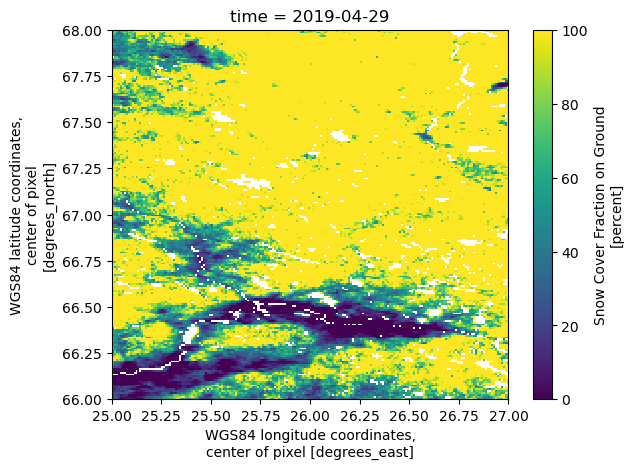

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

date = '29'

filename = f'../scratch/data/SCFG/dap.ceda.ac.uk/2019/04/201904{date}-ESACCI-L3C_SNOW-SCFG-MODIS_TERRA-fv3.0.nc'

# Open the NetCDF file using xarray
data = xr.open_dataset(filename)

plt.figure()

# data.sel(lat=slice(60,70), lon=slice(20,30))['scfg'].plot()

scfg_filtered = data.sel(lat=slice(66,68), lon=slice(25,27))['scfg']
scfg_filtered = scfg_filtered.where(scfg_filtered <= 100, np.nan)
scfg_filtered.plot()

# # Display the dataset
# # data.close()

# plt.figure()

# filename = f'../data_store/data/SCFG/dap.ceda.ac.uk/v2.0/2019/03/201903{date}-ESACCI-L3C_SNOW-SCFG-MODIS_TERRA-fv2.0.nc'

# # Open the NetCDF file using xarray
# data = xr.open_dataset(filename)

# # data.sel(lat=slice(60,70), lon=slice(20,30))['scfg'].plot()

# scfg_filtered = data.sel(lat=slice(66,68), lon=slice(25,27))['scfg']
# scfg_filtered = scfg_filtered.where(scfg_filtered <= 100, np.nan)
# scfg_filtered.plot()

# # Display the dataset
# # data.close()

<xarray.Dataset> Size: 16GB
Dimensions:        (lat: 18000, nv: 2, lon: 36000, time: 1)
Coordinates:
  * time           (time) datetime64[ns] 8B 2019-04-29
  * lat            (lat) float64 144kB -90.0 -89.98 -89.97 ... 89.98 89.98 90.0
  * lon            (lon) float64 288kB -180.0 -180.0 -180.0 ... 180.0 180.0
Dimensions without coordinates: nv
Data variables:
    lat_bnds       (lat, nv) float64 288kB ...
    lon_bnds       (lon, nv) float64 576kB ...
    scfg           (time, lat, lon) float32 3GB ...
    scfg_unc       (time, lat, lon) float32 3GB ...
    satzen         (time, lat, lon) float64 5GB ...
    scanline_time  (time, lat, lon) float64 5GB ...
    spatial_ref    int32 4B ...
Attributes: (12/42)
    title:                      ESA CCI snow on ground product level L3C dail...
    institution:                ENVEO IT GmbH
    source:                     TERRA MODIS, Collection 6.1: calibrated radia...
    history:                    2024-02-02: ESA snow_cci processing line SCFG...
    references:                 http://snow-cci.enveo.at/
    tracking_id:                aa391fc0-48ec-43a7-8732-882f277fb36d
    ...                         ...
    license:                    ESA CCI Data Policy: free and open access
    platform:                   TERRA
    sensor:                     MODIS
    spatial_resolution:         0.01 degree
    key_variables:              scfg
    doi:                        10.5285/80567d38de3f4b038ee6e6e53ed1af8a

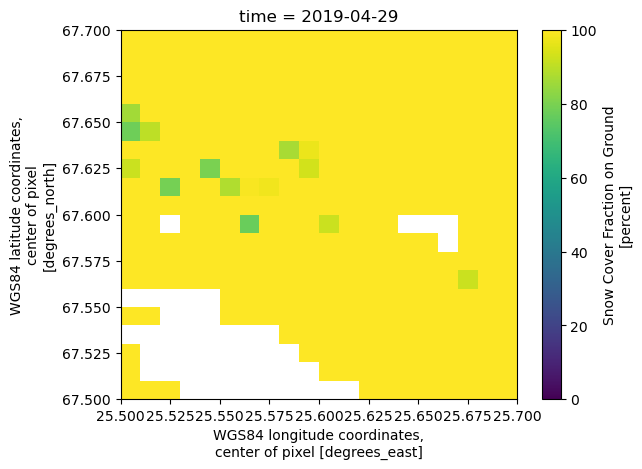

In [33]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

date = '29'

filename = f'../scratch/data/SCFG/dap.ceda.ac.uk/2019/04/201904{date}-ESACCI-L3C_SNOW-SCFG-MODIS_TERRA-fv3.0.nc'

# Open the NetCDF file using xarray
data = xr.open_dataset(filename)

plt.figure()

# data.sel(lat=slice(60,70), lon=slice(20,30))['scfg'].plot()

scfg_filtered = data.sel(lat=slice(67.5,67.7), lon=slice(25.5,25.7))['scfg']
scfg_filtered = scfg_filtered.where(scfg_filtered <= 100, np.nan)
scfg_filtered.plot(vmin=0, vmax=100)

# Display the dataset
# data.close()

# data.lat_bnds[:10].values
data

In [33]:
# import pandas as pd

# # Load camera coordinates
# cam_df = pd.read_excel('./snow_cam_details.xlsx')
# cam_df = cam_df.drop_duplicates(subset='Camera')[['Camera', 'x_coord', 'y_coord']]
# cam_df = cam_df.set_index('Camera')
# cam_df.rename(columns={'x_coord': 'lon', 'y_coord': 'lat'}, inplace=True)

# cam_df

In [1]:
# import os
# import numpy as np
# import pandas as pd
# import xarray as xr
# from datetime import datetime, timedelta

# # === Load camera coordinates ===
# cam_df = pd.read_excel('./snow_cam_details.xlsx')
# cam_df = cam_df.drop_duplicates(subset='Camera')[['Camera', 'x_coord', 'y_coord']]
# cam_df = cam_df.set_index('Camera')
# cam_df.rename(columns={'x_coord': 'lon', 'y_coord': 'lat'}, inplace=True)

# # === Create output directory if not exists ===
# output_dir = '../scratch/data/SCFG_zarrs'
# os.makedirs(output_dir, exist_ok=True)

# # === Constants ===
# LAT_DELTA_KM = 10
# LON_DELTA_KM = 10

# # === Date range ===
# start_date = datetime(2018, 10, 1)
# end_date = datetime(2022, 12, 31)
# num_days = (end_date - start_date).days + 1

# # === Track which cameras have been written to ===
# written_cameras = set()

# # === Iterate through dates ===
# for i in range(num_days):
#     date = start_date + timedelta(days=i)
#     date_str = date.strftime('%Y%m%d')
#     year = date.strftime('%Y')
#     month = date.strftime('%m')
#     filename = f'../scratch/data/SCFG/dap.ceda.ac.uk/{year}/{month}/{date_str}-ESACCI-L3C_SNOW-SCFG-MODIS_TERRA-fv3.0.nc'
    
#     if not os.path.exists(filename):
#         print(f"File not found: {filename}")
#         continue

#     print(f"Processing file: {filename}")

#     with xr.open_dataset(filename) as ds:
#         for cam_name, row in cam_df.iterrows():
#             lat_c = row['lat']
#             lon_c = row['lon']
            
#             lat_delta = LAT_DELTA_KM / 111.0
#             lon_delta = LON_DELTA_KM / (111.0 * np.cos(np.radians(lat_c)))

#             lat_min = lat_c - lat_delta / 2
#             lat_max = lat_c + lat_delta / 2
#             lon_min = lon_c - lon_delta / 2
#             lon_max = lon_c + lon_delta / 2

#             try:
#                 ds_subset = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
#                 ds_subset = ds_subset[['scfg']]
#                 ds_subset['scfg'] = ds_subset['scfg'].where(ds_subset['scfg'] <= 100, np.nan)
#                 ds_subset = ds_subset.assign_coords(time=("time", [np.datetime64(date, 'ns')]))

#                 out_path = os.path.join(output_dir, f"{cam_name}.zarr")

#                 # Determine mode
#                 if cam_name not in written_cameras:
#                     mode = 'w'
#                     written_cameras.add(cam_name)
#                 else:
#                     mode = 'a'

#                 ds_subset.to_zarr(out_path, mode=mode, append_dim='time' if mode == 'a' else None)

#                 print(f"{'Overwrote' if mode == 'w' else 'Appended'} {cam_name} for {date_str}")
#             except Exception as e:
#                 print(f"Failed for {cam_name} on {date_str}: {e}")


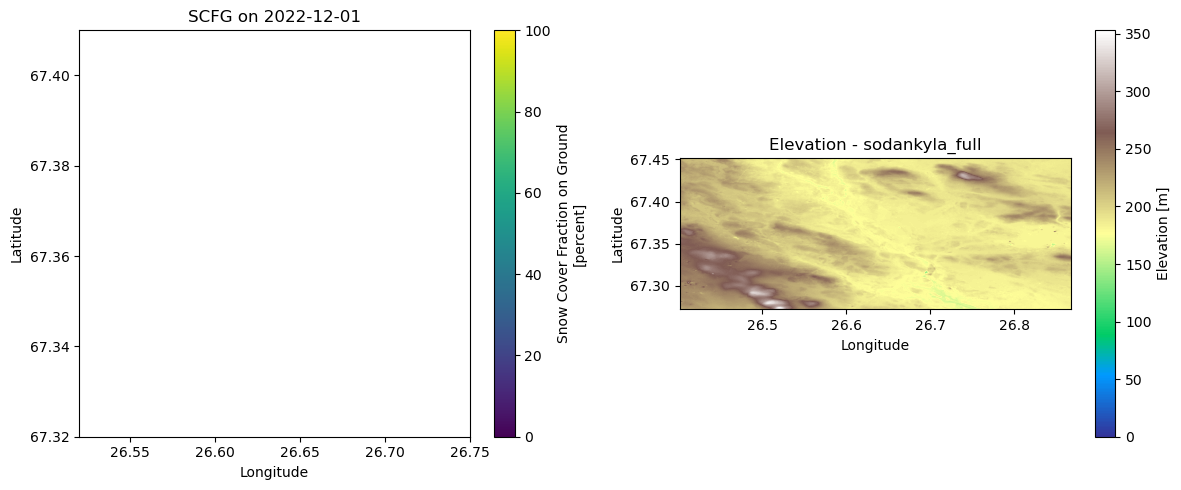

In [6]:
import xarray as xr
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os

# === Define camera name ===
cam_name = 'sodankyla_full'

# === Construct paths ===
zarr_path = f'../scratch/data/SCFG_zarrs/{cam_name}.zarr'
dem_path = f'../scratch/data/landsat_masking/ALOS_AW3D30_Elevation_{cam_name}.tif'

# === Open Zarr dataset ===
ds = xr.open_zarr(zarr_path)

# === Load elevation data using rasterio ===
with rasterio.open(dem_path) as src:
    elevation = src.read(1)
    elevation = np.where(elevation == src.nodata, np.nan, elevation)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

# === Select a time slice ===
time_slice = '2022-12-01'
scfg_slice = ds['scfg'].sel(time=time_slice)

# === Plot SCFG and elevation side by side ===
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# SCFG plot
scfg_slice.plot(ax=axs[0], vmin=0, vmax=100, cmap='viridis')
axs[0].set_title(f"SCFG on {time_slice}")
axs[0].set_xlabel("Longitude")
axs[0].set_ylabel("Latitude")

# Elevation plot
im = axs[1].imshow(elevation, cmap='terrain', extent=extent, origin='upper')
axs[1].set_title(f"Elevation - {cam_name}")
axs[1].set_xlabel("Longitude")
axs[1].set_ylabel("Latitude")
plt.colorbar(im, ax=axs[1], label='Elevation [m]')

plt.tight_layout()
plt.show()

import pandas as pd
# === Load camera coordinates ===
cam_df = pd.read_excel('./snow_cam_details.xlsx')
cam_df = cam_df.drop_duplicates(subset='Camera')[['Camera', 'x_coord', 'y_coord', 'Altitude']]
cam_df = cam_df.set_index('Camera')
cam_df.rename(columns={'x_coord': 'lon', 'y_coord': 'lat'}, inplace=True)

Processing camera: torgnon


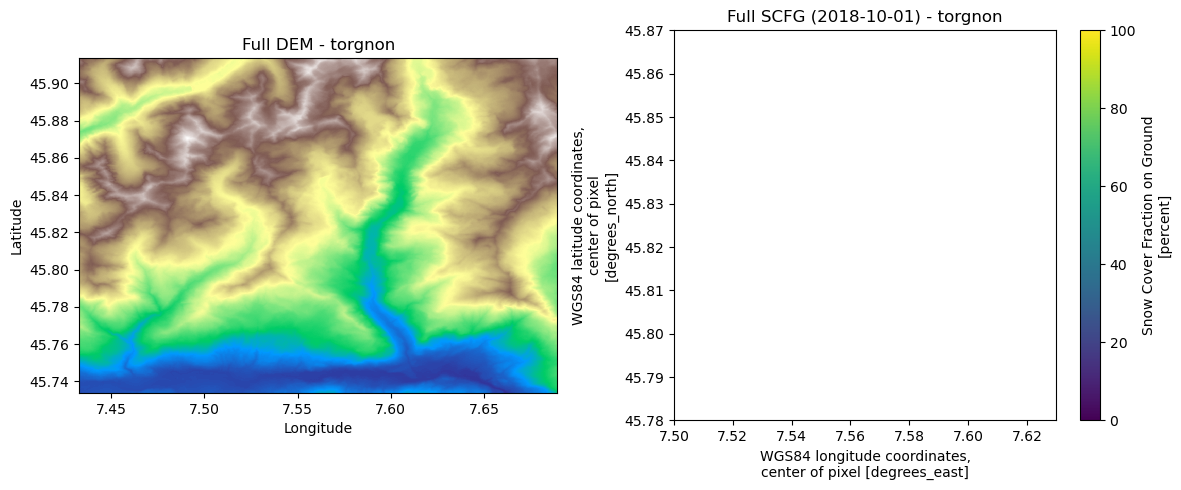

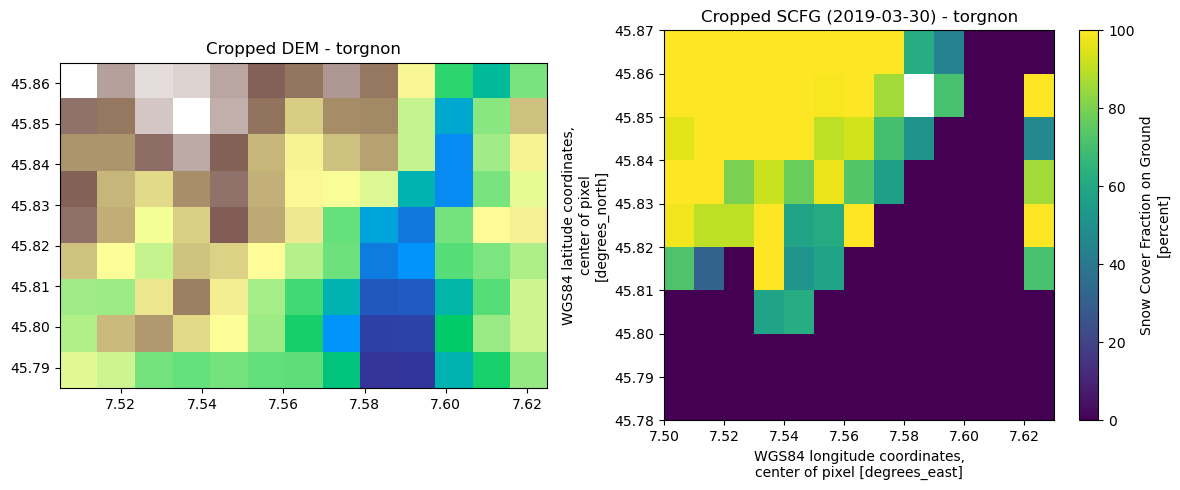

Finished processing.


In [31]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import rasterio
from datetime import datetime
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
from itertools import combinations

# === Load camera metadata ===
cam_df = pd.read_excel('./snow_cam_details.xlsx')
cam_df = cam_df.drop_duplicates(subset='Camera')[['Camera', 'x_coord', 'y_coord', 'Altitude']]
cam_df = cam_df.set_index('Camera')
cam_df.rename(columns={'x_coord': 'lon', 'y_coord': 'lat'}, inplace=True)

# === Constants ===
BOX_KM = 10
LAT_DEG = BOX_KM / 111.0
results = []
first_camera = True

for cam_name, row in cam_df.iterrows():
    if cam_name != 'torgnon':
        continue
    print(f"Processing camera: {cam_name}")
    lat_c = row['lat']
    lon_c = row['lon']
    LON_DEG = BOX_KM / (111.0 * np.cos(np.radians(lat_c)))

    # === Build paths ===
    zarr_path = f'../scratch/data/SCFG_zarrs/{cam_name}.zarr'
    dem_path = f'../scratch/data/landsat_masking/ALOS_AW3D30_Elevation_{cam_name}.tif'

    if not os.path.exists(zarr_path) or not os.path.exists(dem_path):
        print(f"Missing data for {cam_name}, skipping.")
        continue

    # === Load SCFG dataset ===
    try:
        ds = xr.open_zarr(zarr_path)
    except Exception as e:
        print(f"Failed to open Zarr for {cam_name}: {e}")
        continue

    try:
        full_scfg = ds['scfg']
    except Exception:
        print(f"Failed to access 'scfg' for {cam_name}, skipping.")
        continue

    # Subset SCFG to 5x5 km box
    try:
        scfg = full_scfg.sel(
            lat=slice(lat_c - LAT_DEG / 2, lat_c + LAT_DEG / 2),
            lon=slice(lon_c - LON_DEG / 2, lon_c + LON_DEG / 2)
        )
    except Exception as e:
        print(f"Failed to slice Zarr for {cam_name}: {e}")
        continue

    # === Load DEM ===
    with rasterio.open(dem_path) as src:
        dem = src.read(1)
        dem = np.where(dem == src.nodata, np.nan, dem)
        bounds = src.bounds
        res_x, res_y = src.res
        dem_lon = np.linspace(bounds.left + res_x/2, bounds.right - res_x/2, src.width)
        dem_lat = np.linspace(bounds.top - res_y/2, bounds.bottom + res_y/2, src.height)
        dem_lat = dem_lat[::-1]  # because rasterio origin='upper'

    # Plot full DEM and full SCFG on first camera
    if first_camera:
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))
        axs[0].imshow(dem, cmap='terrain', extent=[dem_lon[0], dem_lon[-1], dem_lat[0], dem_lat[-1]])
        axs[0].set_title(f"Full DEM - {cam_name}")
        axs[0].set_xlabel("Longitude")
        axs[0].set_ylabel("Latitude")
        full_scfg.sel(time=full_scfg.time[0]).plot(ax=axs[1], vmin=0, vmax=100)
        axs[1].set_title(f"Full SCFG ({str(full_scfg.time[0].values)[:10]}) - {cam_name}")
        plt.tight_layout()
        plt.show()

    # Create mesh for DEM and flatten
    dem_lon_grid, dem_lat_grid = np.meshgrid(dem_lon, dem_lat)
    dem_points = np.column_stack((dem_lat_grid.ravel(), dem_lon_grid.ravel()))
    dem_values = dem.ravel()

    # Subset to bounding box
    mask = (
        (dem_points[:, 0] >= lat_c - LAT_DEG / 2) & (dem_points[:, 0] <= lat_c + LAT_DEG / 2) &
        (dem_points[:, 1] >= lon_c - LON_DEG / 2) & (dem_points[:, 1] <= lon_c + LON_DEG / 2)
    )
    dem_points = dem_points[mask]
    dem_values = dem_values[mask]

    if len(dem_values) == 0:
        print(f"No DEM values in bounds for {cam_name}")
        continue

    # SCFG grid locations
    scfg_lat = scfg.lat.values
    scfg_lon = scfg.lon.values
    scfg_grid = np.array([(la, lo) for la in scfg_lat for lo in scfg_lon])
    scfg_shape = (len(scfg_lat), len(scfg_lon))

    # Nearest SCFG pixel for each DEM point
    tree = cKDTree(scfg_grid)
    _, dem_to_scfg_idx = tree.query(dem_points)
    dem_to_scfg = np.unravel_index(dem_to_scfg_idx, scfg_shape)

    # Compute mean elevation for each SCFG pixel
    elevation_map = np.full(scfg_shape, np.nan)
    for i in range(np.prod(scfg_shape)):
        lat_idx, lon_idx = np.unravel_index(i, scfg_shape)
        mask = dem_to_scfg_idx == i
        if np.any(mask):
            elevation_map[lat_idx, lon_idx] = np.nanmean(dem_values[mask])

    # Plot cropped SCFG and DEM on first camera
    if first_camera:
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))
        axs[0].imshow(elevation_map, cmap='terrain', origin='upper', extent=[
            scfg.lon.values[0], scfg.lon.values[-1], scfg.lat.values[0], scfg.lat.values[-1]])
        axs[0].set_title(f"Cropped DEM - {cam_name}")
        scfg.sel(time=scfg.time[180]).plot(ax=axs[1], vmin=0, vmax=100)
        axs[1].set_title(f"Cropped SCFG ({str(scfg.time[180].values)[:10]}) - {cam_name}")
        plt.tight_layout()
        plt.show()
        first_camera = False

    # Identify central SCFG pixel closest to camera
    ref_lat_idx = np.argmin(np.abs(scfg_lat - lat_c))
    ref_lon_idx = np.argmin(np.abs(scfg_lon - lon_c))

    # === Iterate over dates ===
    for t in scfg.time.values:
        t_pd = pd.to_datetime(t)
        t_str = t_pd.strftime('%Y-%m-%d')
        month_str = t_pd.strftime('%Y-%m')

        try:
            scfg_vals = scfg.sel(time=t).values
        except Exception:
            continue

        if np.isnan(scfg_vals).all():
            continue

        # Flatten SCFG and elevation maps with coordinates
        valid_pixels = []
        for lat_idx in range(scfg_shape[0]):
            for lon_idx in range(scfg_shape[1]):
                val = scfg_vals[lat_idx, lon_idx]
                elev = elevation_map[lat_idx, lon_idx]
                if not np.isnan(val) and not np.isnan(elev):
                    lat = scfg_lat[lat_idx]
                    lon = scfg_lon[lon_idx]
                    valid_pixels.append((lat, lon, elev, val, lat_idx, lon_idx))

        if len(valid_pixels) < 2:
            continue

        coords = np.array([(lat, lon) for lat, lon, *_ in valid_pixels])
        lats = coords[:, 0]
        lons = coords[:, 1]

        # Convert lat/lon to approximate Cartesian coordinates (in km)
        x = (lons - lon_c) * 111.0 * np.cos(np.radians(lats))  # km
        y = (lats - lat_c) * 111.0  # km
        xy_coords = np.column_stack((x, y))

        # Find all pairs within 5 km
        tree = cKDTree(xy_coords)
        pairs = tree.query_pairs(r=5.0)

        for i, j in pairs:
            lat_i, lon_i, elev_i, val_i, _, _ = valid_pixels[i]
            lat_j, lon_j, elev_j, val_j, _, _ = valid_pixels[j]

            distance = np.linalg.norm(xy_coords[i] - xy_coords[j])  # km

            results.append({
                'camera': cam_name,
                'date': t_str,
                'month': month_str,
                'elevation_1': elev_i,
                'elevation_2': elev_j,
                'scfg_1': val_i,
                'scfg_2': val_j,
                'delta_elevation': elev_j - elev_i,
                'delta_scfg': val_j - val_i,
                'distance_km': distance
            })

# === Final DataFrame ===
df = pd.DataFrame(results)
print("Finished processing.")


In [32]:
df

,camera,date,month,elevation_1,elevation_2,scfg_1,scfg_2,delta_elevation,delta_scfg,distance_km
0,torgnon,2018-10-02,2018-10,2575.943755,1966.550767,0.0,0.0,-609.392988,0.0,3.672083
1,torgnon,2018-10-02,2018-10,1252.366691,1778.018992,0.0,0.0,525.652301,0.0,4.546407
2,torgnon,2018-10-02,2018-10,1684.872900,1506.660115,0.0,0.0,-178.212785,0.0,3.330001
3,torgnon,2018-10-02,2018-10,2034.876552,1381.262966,0.0,0.0,-653.613587,0.0,3.807750
4,torgnon,2018-10-02,2018-10,2394.227904,1805.270270,0.0,0.0,-588.957633,0.0,3.330000
...,...,...,...,...,...,...,...,...,...,...
1959062,torgnon,2022-12-29,2022-12,2198.078890,2337.665607,34.0,48.0,139.586717,14.0,1.352642
1959063,torgnon,2022-12-29,2022-12,2197.618442,2010.422936,24.0,63.0,-187.195506,39.0,1.904891
1959064,torgnon,2022-12-29,2022-12,2394.227904,2563.310446,100.0,57.0,169.082542,-43.0,0.773784
1959065,torgnon,2022-12-29,2022-12,2198.078890,1890.851717,34.0,77.0,-307.227173,43.0,2.351316


In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import rasterio
from datetime import datetime
from scipy.spatial import cKDTree
from itertools import combinations

import csv

# === Load camera metadata ===
cam_df = pd.read_excel('./snow_cam_details.xlsx')
cam_df = cam_df.drop_duplicates(subset='Camera')[['Camera', 'x_coord', 'y_coord', 'Altitude']]
cam_df = cam_df.set_index('Camera')
cam_df.rename(columns={'x_coord': 'lon', 'y_coord': 'lat'}, inplace=True)

# === Constants ===
BOX_KM = 10
LAT_DEG = BOX_KM / 111.0
results = []

output_path = f'../scratch/data/pairwise_results.csv'

for cam_name, row in cam_df.iterrows():
    # if cam_name != 'sodankyla_full':
    #     continue
    print(f"Processing camera: {cam_name}")
    lat_c = row['lat']
    lon_c = row['lon']
    LON_DEG = BOX_KM / (111.0 * np.cos(np.radians(lat_c)))

    # === Build paths ===
    zarr_path = f'../scratch/data/SCFG_zarrs/{cam_name}.zarr'
    dem_path = f'../scratch/data/landsat_masking/ALOS_AW3D30_Elevation_{cam_name}.tif'

    if not os.path.exists(zarr_path) or not os.path.exists(dem_path):
        print(f"Missing data for {cam_name}, skipping.")
        continue

    # === Load SCFG dataset ===
    try:
        ds = xr.open_zarr(zarr_path)
    except Exception as e:
        print(f"Failed to open Zarr for {cam_name}: {e}")
        continue

    # Subset SCFG to 5x5 km box
    try:
        scfg = ds['scfg'].sel(
            lat=slice(lat_c - LAT_DEG / 2, lat_c + LAT_DEG / 2),
            lon=slice(lon_c - LON_DEG / 2, lon_c + LON_DEG / 2)
        )
    except Exception as e:
        print(f"Failed to slice Zarr for {cam_name}: {e}")
        continue

    # === Load DEM ===
    with rasterio.open(dem_path) as src:
        dem = src.read(1)
        dem = np.where(dem == src.nodata, np.nan, dem)
        bounds = src.bounds
        res_x, res_y = src.res
        dem_lon = np.linspace(bounds.left + res_x/2, bounds.right - res_x/2, src.width)
        dem_lat = np.linspace(bounds.top - res_y/2, bounds.bottom + res_y/2, src.height)
        dem_lat = dem_lat[::-1]  # because rasterio origin='upper'

    # Create mesh for DEM and flatten
    dem_lon_grid, dem_lat_grid = np.meshgrid(dem_lon, dem_lat)
    dem_points = np.column_stack((dem_lat_grid.ravel(), dem_lon_grid.ravel()))
    dem_values = dem.ravel()

    # Subset to bounding box
    mask = (
        (dem_points[:, 0] >= lat_c - LAT_DEG / 2) & (dem_points[:, 0] <= lat_c + LAT_DEG / 2) &
        (dem_points[:, 1] >= lon_c - LON_DEG / 2) & (dem_points[:, 1] <= lon_c + LON_DEG / 2)
    )
    dem_points = dem_points[mask]
    dem_values = dem_values[mask]

    if len(dem_values) == 0:
        print(f"No DEM values in bounds for {cam_name}")
        continue

    # SCFG grid locations
    scfg_lat = scfg.lat.values
    scfg_lon = scfg.lon.values
    scfg_grid = np.array([(la, lo) for la in scfg_lat for lo in scfg_lon])
    scfg_shape = (len(scfg_lat), len(scfg_lon))

    # Nearest SCFG pixel for each DEM point
    tree = cKDTree(scfg_grid)
    _, dem_to_scfg_idx = tree.query(dem_points)
    dem_to_scfg = np.unravel_index(dem_to_scfg_idx, scfg_shape)

    # Compute mean elevation for each SCFG pixel
    elevation_map = np.full(scfg_shape, np.nan)
    for i in range(np.prod(scfg_shape)):
        lat_idx, lon_idx = np.unravel_index(i, scfg_shape)
        mask = dem_to_scfg_idx == i
        if np.any(mask):
            elevation_map[lat_idx, lon_idx] = np.nanmean(dem_values[mask])

    # Identify central SCFG pixel closest to camera
    ref_lat_idx = np.argmin(np.abs(scfg_lat - lat_c))
    ref_lon_idx = np.argmin(np.abs(scfg_lon - lon_c))

    # === Iterate over dates ===
    first_write = not os.path.exists(output_path)
    
    for t in scfg.time.values:
        t_pd = pd.to_datetime(t)
        t_str = t_pd.strftime('%Y-%m-%d')
        month_str = t_pd.strftime('%Y-%m')
    
        try:
            scfg_vals = scfg.sel(time=t).values
        except Exception:
            continue
    
        if np.isnan(scfg_vals).all():
            continue
    
        # Flatten SCFG and elevation maps with coordinates
        valid_pixels = []
        for lat_idx in range(scfg_shape[0]):
            for lon_idx in range(scfg_shape[1]):
                val = scfg_vals[lat_idx, lon_idx]
                elev = elevation_map[lat_idx, lon_idx]
                if not np.isnan(val) and not np.isnan(elev):
                    lat = scfg_lat[lat_idx]
                    lon = scfg_lon[lon_idx]
                    valid_pixels.append((lat, lon, elev, val, lat_idx, lon_idx))
    
        if len(valid_pixels) < 2:
            continue
    
        coords = np.array([(lat, lon) for lat, lon, *_ in valid_pixels])
        lats = coords[:, 0]
        lons = coords[:, 1]
    
        # Convert lat/lon to approximate Cartesian coordinates (in km)
        x = (lons - lon_c) * 111.0 * np.cos(np.radians(lats))  # km
        y = (lats - lat_c) * 111.0  # km
        xy_coords = np.column_stack((x, y))
    
        # Find all pairs within 5 km
        tree = cKDTree(xy_coords)
        pairs = tree.query_pairs(r=5.0)
    
        # Append results directly to file
        with open(output_path, 'a', newline='') as f:
            writer = csv.DictWriter(f, fieldnames=[
                'camera', 'date', 'month',
                'elevation_1', 'elevation_2',
                'scfg_1', 'scfg_2',
                'delta_elevation', 'delta_scfg', 'distance_km'
            ])
            if first_write:
                writer.writeheader()
                first_write = False
    
            for i, j in pairs:
                lat_i, lon_i, elev_i, val_i, _, _ = valid_pixels[i]
                lat_j, lon_j, elev_j, val_j, _, _ = valid_pixels[j]
                distance = np.linalg.norm(xy_coords[i] - xy_coords[j])
    
                writer.writerow({
                    'camera': cam_name,
                    'date': t_str,
                    'month': month_str,
                    'elevation_1': elev_i,
                    'elevation_2': elev_j,
                    'scfg_1': val_i,
                    'scfg_2': val_j,
                    'delta_elevation': elev_j - elev_i,
                    'delta_scfg': val_j - val_i,
                    'distance_km': distance
                })

# === Final DataFrame ===
# df = pd.DataFrame(results)
print("Finished processing.")


Processing camera: bartlett
Processing camera: delta_junction
Processing camera: glees
Processing camera: hyytiala
Processing camera: kenttarova
Processing camera: lacclair
Processing camera: marcell_MN
Processing camera: old_jack_pine
Processing camera: oregon_yp
Processing camera: queens
Processing camera: sodankyla_full
Processing camera: tammela
Processing camera: torgnon
Processing camera: underc
Processing camera: underhill
Processing camera: varrio
Processing camera: willowcreek
Processing camera: wslcreek
Finished processing.


In [1]:
import pandas as pd

# df.to_pickle('elevation_analysis.pkl')
# df = pd.read_pickle('elevation_analysis.pkl')

df = pd.read_csv('../scratch/data/pairwise_results.csv')

In [4]:
df

,camera,date,month,elevation_1,elevation_2,scfg_1,scfg_2,delta_elevation,delta_scfg,distance_km
0,bartlett,2018-10-03,2018-10,222.837107,429.431721,0.0,0.0,206.594614,0.0,4.717804
1,bartlett,2018-10-03,2018-10,472.218408,680.858291,0.0,0.0,208.639883,0.0,3.424404
2,bartlett,2018-10-03,2018-10,535.501351,272.177502,0.0,0.0,-263.323850,0.0,3.987960
3,bartlett,2018-10-03,2018-10,427.587290,451.791506,0.0,0.0,24.204216,0.0,3.691490
4,bartlett,2018-10-03,2018-10,275.493791,349.921841,0.0,0.0,74.428050,0.0,0.797996
...,...,...,...,...,...,...,...,...,...,...
42336378,wslcreek,2022-12-23,2022-12,3242.526662,3518.525752,100.0,100.0,275.999090,0.0,3.436745
42336379,wslcreek,2022-12-23,2022-12,2891.570489,2956.626735,100.0,100.0,65.056245,0.0,3.740483
42336380,wslcreek,2022-12-23,2022-12,2772.514225,3149.019722,100.0,100.0,376.505498,0.0,4.764426
42336381,wslcreek,2022-12-23,2022-12,3349.395909,3336.466764,100.0,100.0,-12.929145,0.0,3.330000


/tmp/ipykernel_2130763/2671595040.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('elev_bin')['delta_scfg']


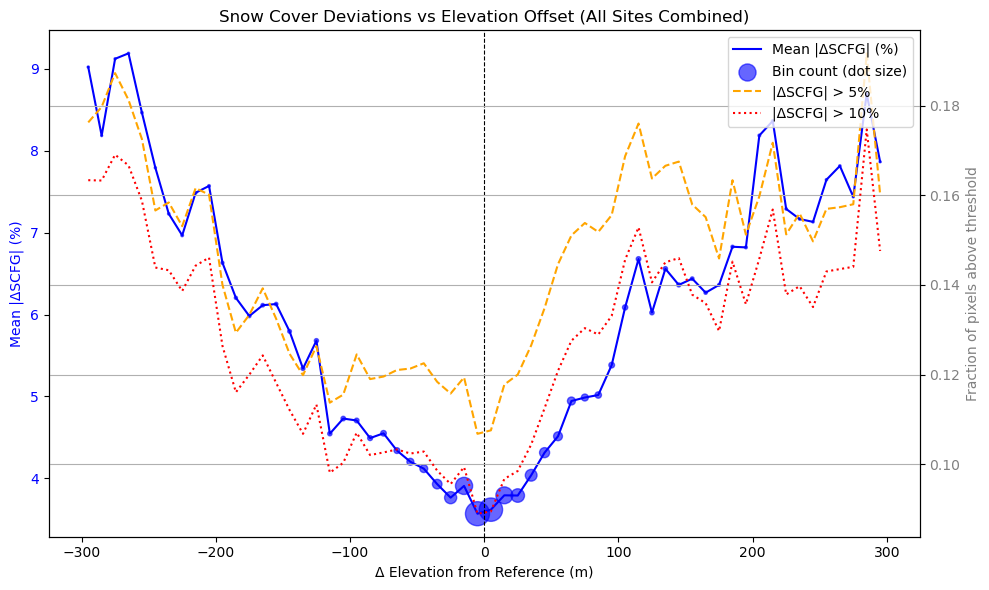

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Filter and prepare ===
df_filtered = df[(df['delta_elevation'] >= -300) & (df['delta_elevation'] <= 300)].copy()
df_filtered['abs_delta_scfg'] = np.abs(df_filtered['delta_scfg'])

# === Bin Δelevation ===
bin_width = 10
bins = np.arange(-300, 310, bin_width)
bin_labels = bins[:-1] + bin_width / 2
df_filtered['elev_bin'] = pd.cut(df_filtered['delta_elevation'], bins=bins, labels=bin_labels)

# === Define helper functions ===
def frac_above_threshold(x, threshold):
    if len(x) == 0:
        return np.nan
    return np.mean(np.abs(x) > threshold)

# === Group and summarize ===
summary = (
    df_filtered
    .groupby('elev_bin')['delta_scfg']
    .agg(
        count='count',
        mean_abs=lambda x: np.mean(np.abs(x)),
        frac_gt_5=lambda x: frac_above_threshold(x, 5),
        frac_gt_10=lambda x: frac_above_threshold(x, 10)
    )
    .dropna()
    .reset_index()
)

summary['elev_bin'] = summary['elev_bin'].astype(float)

# === Plot ===
fig, ax1 = plt.subplots(figsize=(10, 6))

# Mean |ΔSCFG| line
ax1.plot(summary['elev_bin'], summary['mean_abs'], color='blue', label='Mean |ΔSCFG| (%)')

# Dots with size scaled to count
size_scale = 300  # increase for larger dots
sizes = (summary['count'] / summary['count'].max()) * size_scale
ax1.scatter(summary['elev_bin'], summary['mean_abs'], s=sizes, color='blue', alpha=0.6, label='Bin count (dot size)')

# Format left y-axis
ax1.set_ylabel("Mean |ΔSCFG| (%)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Threshold lines on right y-axis
ax2 = ax1.twinx()
ax2.plot(summary['elev_bin'], summary['frac_gt_5'], label='|ΔSCFG| > 5%', color='orange', linestyle='--')
ax2.plot(summary['elev_bin'], summary['frac_gt_10'], label='|ΔSCFG| > 10%', color='red', linestyle=':')
ax2.set_ylabel("Fraction of pixels above threshold", color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Axes and title
ax1.axvline(0, color='black', linestyle='--', linewidth=0.8)
ax1.set_xlabel("Δ Elevation from Reference (m)")
plt.title("Snow Cover Deviations vs Elevation Offset (All Sites Combined)")

# Legend
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
plt.grid(True)
plt.tight_layout()
plt.show()


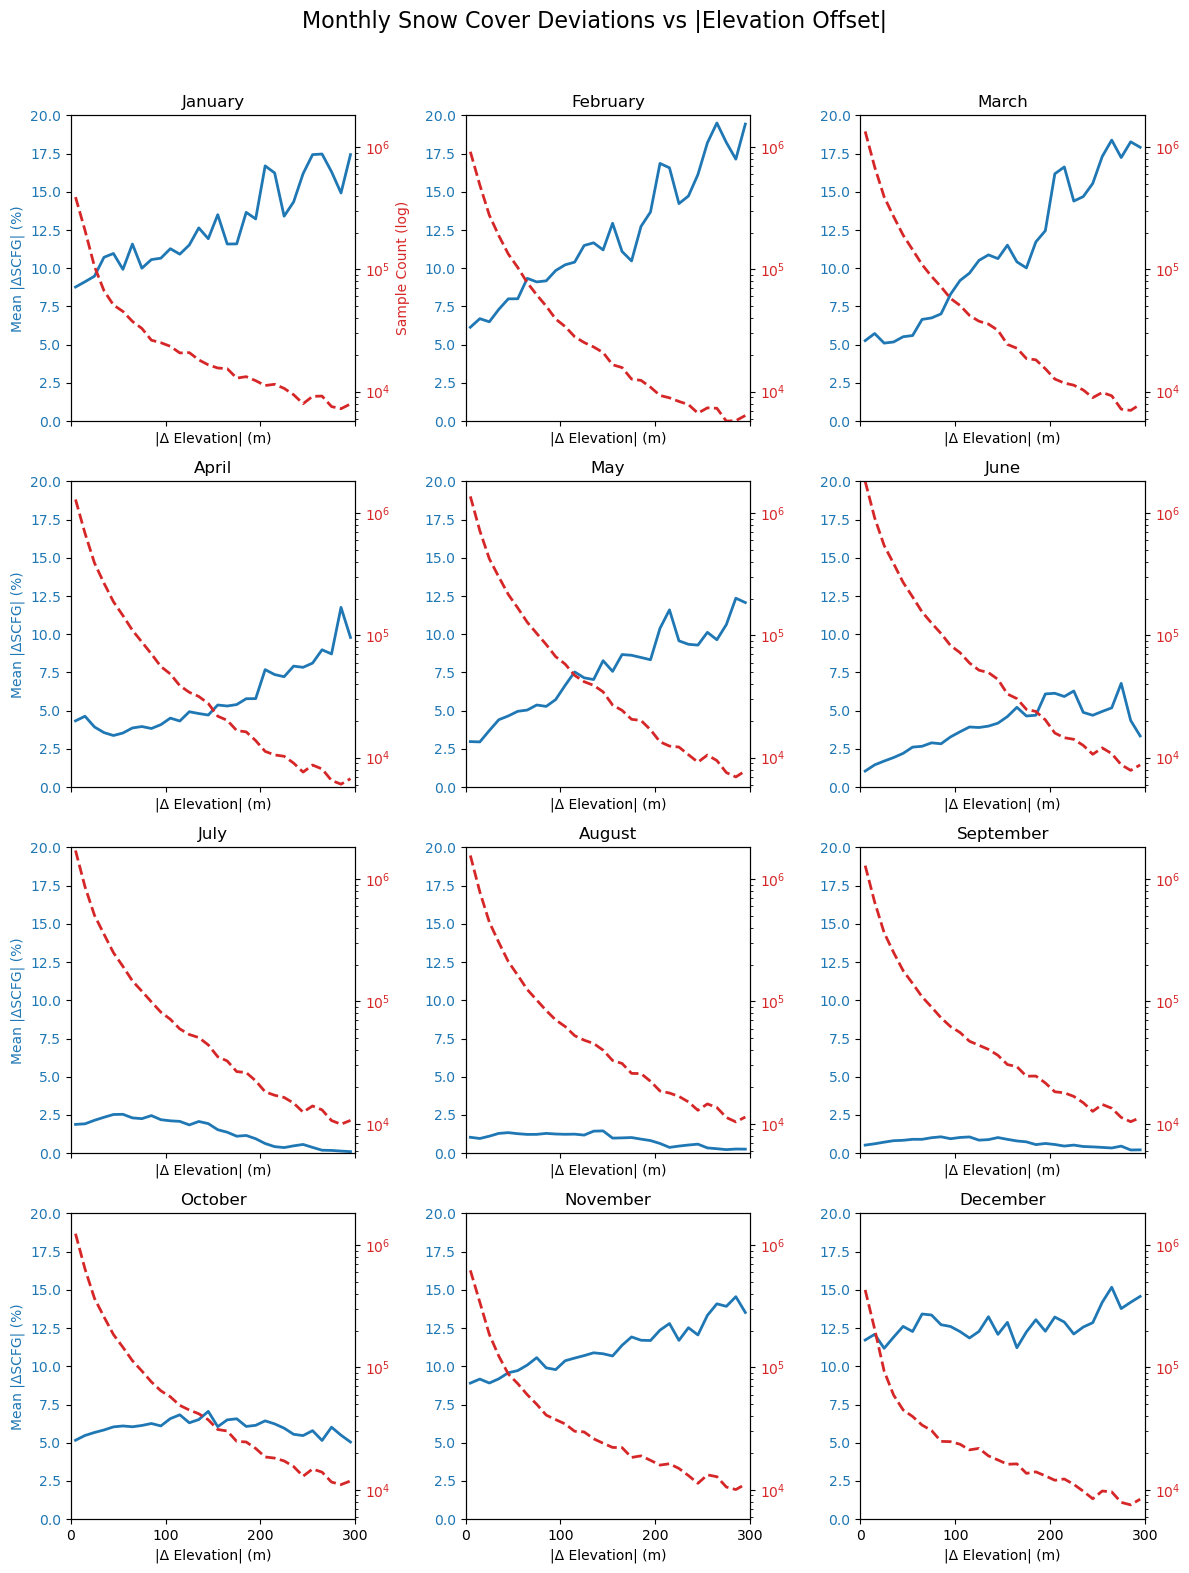

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

# === Filter and prepare ===
df_filtered = df.copy()
df_filtered['abs_delta_elev'] = np.abs(df_filtered['delta_elevation'])
df_filtered = df_filtered[(df_filtered['abs_delta_elev'] <= 300)]
df_filtered['abs_delta_scfg'] = np.abs(df_filtered['delta_scfg'])
df_filtered['month'] = pd.to_datetime(df_filtered['date']).dt.month

# === Bin |Δelevation| ===
bin_width = 10
bins = np.arange(0, 310, bin_width)                 # 0..300 inclusive
bin_labels = bins[:-1] + bin_width / 2              # label by bin midpoints
df_filtered['elev_bin'] = pd.cut(df_filtered['abs_delta_elev'], bins=bins, labels=bin_labels)

# === Helper function ===
def frac_above_threshold(x, threshold):
    return np.mean(np.abs(x) > threshold) if len(x) > 0 else np.nan

# === Prepare summaries ===
months = sorted(df_filtered['month'].unique())
summaries = {}
max_mean_abs = 0.0
all_counts = []

for month in months:
    df_month = df_filtered[df_filtered['month'] == month]
    summary = (
        df_month
        .groupby('elev_bin', observed=False)['delta_scfg']
        .agg(
            count='count',
            mean_abs=lambda x: np.mean(np.abs(x)),
            frac_gt_5=lambda x: frac_above_threshold(x, 5),
            frac_gt_10=lambda x: frac_above_threshold(x, 10)
        )
        .dropna()
        .reset_index()
    )
    if not summary.empty:
        summary['elev_bin'] = summary['elev_bin'].astype(float)
        summaries[month] = summary
        max_mean_abs = max(max_mean_abs, np.nanmax(summary['mean_abs']))
        all_counts.extend(summary['count'].values)
    else:
        summaries[month] = summary  # empty

# Global axis ranges
def nice_ceil(x, base):
    if x <= 0:
        return base
    return int(np.ceil(x / base) * base)

y1_max = nice_ceil(max_mean_abs, 5)   # mean |ΔSCFG| (%)

# For log scale: use min>0 and max
if len(all_counts) > 0:
    y2_min = max(1, np.nanmin(all_counts))  # avoid 0 on log scale
    y2_max = nice_ceil(np.nanmax(all_counts), 100)
else:
    y2_min, y2_max = 1, 10

# === Create subplots ===
ncols = 3
nrows = int(np.ceil(len(months) / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 4*nrows), sharex=True)

for i, month in enumerate(months):
    ax1 = axes.flat[i]
    summary = summaries[month]

    # Left axis: Mean |ΔSCFG|
    if not summary.empty:
        ax1.plot(summary['elev_bin'], summary['mean_abs'],
                 color='tab:blue', linewidth=2, label='Mean |ΔSCFG| (%)')
    ax1.set_title(calendar.month_name[month])
    ax1.set_xlabel("|Δ Elevation| (m)")
    if i % ncols == 0:
        ax1.set_ylabel("Mean |ΔSCFG| (%)", color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax1.set_xlim(0, 300)
    ax1.set_xticks(np.arange(0, 301, 100))
    ax1.set_ylim(0, y1_max)

    # Right axis: Sample count (consistent log scale)
    ax2 = ax1.twinx()
    if not summary.empty:
        ax2.plot(summary['elev_bin'], summary['count'],
                 color='tab:red', linewidth=2, linestyle='--', label='Sample Count')
    if i == 0:
        ax2.set_ylabel("Sample Count (log)", color='tab:red')
    ax2.set_yscale('log')
    ax2.set_ylim(y2_min, y2_max)
    ax2.tick_params(axis='y', labelcolor='tab:red')

# Hide any unused subplots
for j in range(i + 1, len(axes.flat)):
    axes.flat[j].axis('off')

fig.suptitle("Monthly Snow Cover Deviations vs |Elevation Offset|", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# SCFG data_array

In [1]:
import pandas as pd
import xarray as xr
import numpy as np
from datetime import datetime
import os

df=pd.read_pickle('dataset.pkl')

values_1 = [[] for _ in range(6)]
values_3 = [[] for _ in range(6)]
values = [values_1, values_3]
radius = [1,3]
coords = [(26.634154, 67.361833), (-145.7514, 63.8811), (-93.4541, 47.5049), 
          (-71.6696, 46.9521), (7.5609, 45.8238), (-121.606, 44.3238)]

start_date = '01/10/2018'
end_date = '31/12/2022'

# Convert strings to datetime objects
start = datetime.strptime(start_date, '%d/%m/%Y')
end = datetime.strptime(end_date, '%d/%m/%Y')

# Generate the array of dates
date_array = [(start + pd.Timedelta(days=i)).strftime('%Y%m%d') 
              for i in range((end - start).days + 1)]

def compute_scfg_value(scfg_data, coord, radius_km=2, threshold=100, default_value=200):
    """
    Compute the SCFG value as the average of values ≤ threshold within a radius_km,
    or set to default_value if all values exceed the threshold.

    Parameters:
        scfg_data (xarray.DataArray): The dataset with SCFG values and spatial dimensions (lat, lon).
        coord (tuple): The coordinate as (lon, lat) for which the value is computed.
        radius_km (float): The radius in kilometers to search around the given coordinate (default: 2).
        threshold (float): The maximum value to include in the average (default: 100).
        default_value (float): The value to assign if all values exceed the threshold (default: 200).

    Returns:
        float: The computed SCFG value.
    """
    # Unpack coordinates
    lon, lat = coord

    # Convert radius from kilometers to degrees
    radius_deg_lat = radius_km / 111.0  # 1 degree latitude ≈ 111 km
    radius_deg_lon = radius_km / (111.0 * np.cos(np.radians(lat)))  # Adjust for latitude

    # Subset the data within the radius
    subset = scfg_data.sel(
        lat=slice(lat - radius_deg_lat, lat + radius_deg_lat),
        lon=slice(lon - radius_deg_lon, lon + radius_deg_lon)
    )

    # Mask values greater than the threshold
    valid_values = subset.where(subset <= threshold, drop=True)

    # Calculate the average or assign the default value
    if valid_values.size > 0:  # If there are valid values
        return valid_values.mean().item()
    else:  # If all values exceed the threshold
        return default_value

for j, date in enumerate(date_array):
    # print(date)
    year = date[:4]
    month = date[4:6]

    file_path = f'../scratch/data/SCFG/dap.ceda.ac.uk/{year}/{month}/{date}-ESACCI-L3C_SNOW-SCFG-MODIS_TERRA-fv3.0.nc'

    # if not os.path.exists(file_path):
    #     print('No')
    #     for i, coord in enumerate(coords):
            

    try:
        dataset = xr.open_dataset(file_path)
    except Exception as e:
        print(f"Failed to open {file_path}: {e}")
        for i in range(len(coords)):
            for A in values:
                if j != 0:
                    A[i].append(A[i][-1])
                else:
                    A[i].append(np.nan)
        continue
    scfg_data = dataset['scfg']

    for i, coord in enumerate(coords):
        for p, A in enumerate(values):
            scfg_value = compute_scfg_value(scfg_data, coord, radius_km=radius[p])
    
            if j == 0:
                if scfg_value <= 100:
                    A[i].append(scfg_value)
                else:
                    A[i].append(np.nan)
            else:
                if scfg_value <= 100:
                    A[i].append(scfg_value)
                else:
                    A[i].append(A[i][-1])

date_array = [datetime.strptime(date, '%Y%m%d') for date in date_array]
# values

Failed to open ../data_store/data/SCFG/dap.ceda.ac.uk/2018/12/20181205-ESACCI-L3C_SNOW-SCFG-MODIS_TERRA-fv2.0.nc: [Errno 2] No such file or directory: '/home/s1803229/data_store/data/SCFG/dap.ceda.ac.uk/2018/12/20181205-ESACCI-L3C_SNOW-SCFG-MODIS_TERRA-fv2.0.nc'


In [24]:
# start_date = '2018-10-01'
# end_date = '2020-12-31'
# date_array = pd.date_range(start=start_date, end=end_date, freq='D').to_pydatetime().tolist()

# 2019

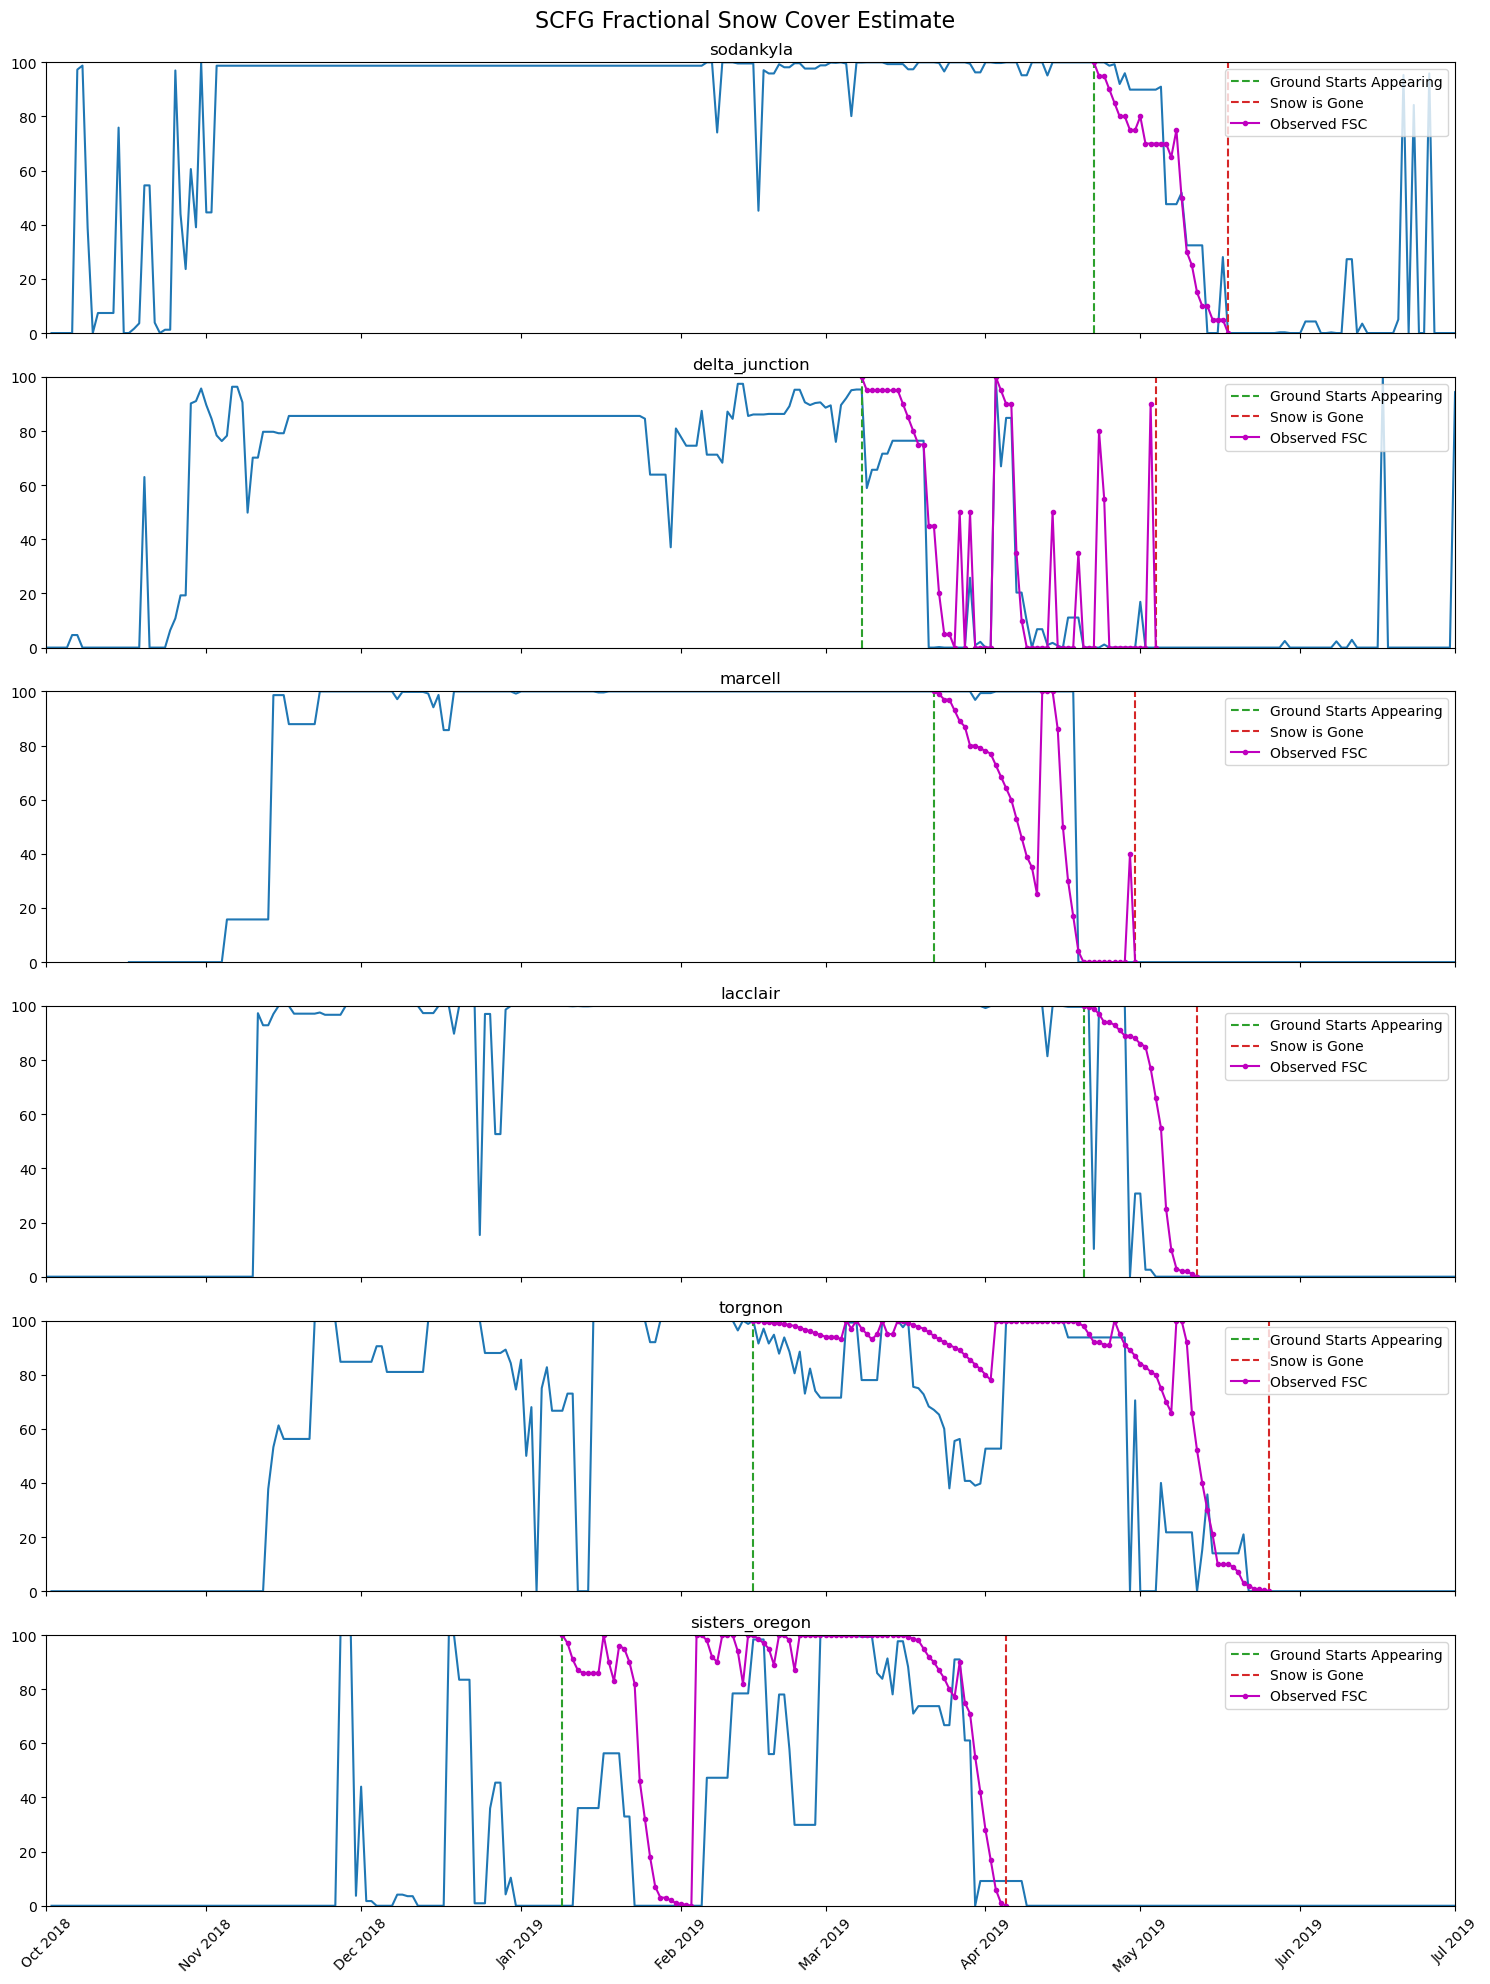

In [16]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

labels = ['sodankyla', 'delta_junction', 'marcell', 'lacclair', 'torgnon', 'sisters_oregon']
first_lines = [datetime.strptime('20190422', '%Y%m%d'),
               datetime.strptime('20190318', '%Y%m%d'),
               datetime.strptime('20190322', '%Y%m%d'),
               datetime.strptime('20190420', '%Y%m%d'),
               datetime.strptime('20190216', '%Y%m%d'),
               datetime.strptime('20190317', '%Y%m%d')]
second_lines = [datetime.strptime('20190518', '%Y%m%d'),
                datetime.strptime('20190326', '%Y%m%d'),
                datetime.strptime('20190420', '%Y%m%d'),
                datetime.strptime('20190512', '%Y%m%d'),
                datetime.strptime('20190526', '%Y%m%d'),
                datetime.strptime('20190405', '%Y%m%d')]

# Create subplots: 6 rows, 1 column
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20), sharex=True)

# Formatting the x-axis limits
start_limit = datetime.strptime('20181001', '%Y%m%d')  
end_limit = datetime.strptime('20190701', '%Y%m%d')  

camera_snow_data = pd.read_excel("snow_timeline.xlsx")

locations = ['Sodankyla', 'Delta Junction', 'Marcell', 'Lacclair', 'Torgnon', 'Sisters']

for i, ax in enumerate(axes):
    # Plot data for each site
    if i == 4:
        ax.plot(date_array, values_1[i], color='tab:blue') #, label=labels[i]
    else:
        ax.plot(date_array, values_3[i], color='tab:blue') #, label=labels[i]
    
    # Add dashed vertical lines
    # ax.axvline(first_lines[i], color='tab:green', linestyle='--', linewidth=1.5, label='Melt Starts')
    # ax.axvline(second_lines[i], color='tab:red', linestyle='--', linewidth=1.5, label='Melt Ends')

    sodankyla_data = camera_snow_data[(camera_snow_data['Location'] == locations[i]) & 
                                      (camera_snow_data['Melt Year'] == 2019)]
    sod_obs = sodankyla_data['FSC'].values.tolist()
    sod_dates = pd.to_datetime(sodankyla_data['Date']).tolist()

    ax.axvline(sod_dates[0], color='tab:green', linestyle='--', linewidth=1.5, label='Ground Starts Appearing')
    ax.axvline(sod_dates[-1], color='tab:red', linestyle='--', linewidth=1.5, label='Snow is Gone')
    
    axes[i].plot(sod_dates, sod_obs, 'm.-', label='Observed FSC')

    # Formatting each subplot
    ax.set_title(labels[i])  # Title for each subplot
    ax.set_ylim(0, 100)  # Set the y-axis limits
    ax.set_xlim([start_limit, end_limit])  # Set the x-axis limits
    ax.legend(loc='upper right')  # Add legend to each subplot
    ax.xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks on the first of each month
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format ticks as Month-Year

# Rotate tick labels for shared x-axis
plt.xticks(rotation=45)

# Set the main title and adjust layout
fig.suptitle('SCFG Fractional Snow Cover Estimate', fontsize=16, y=.99)
plt.tight_layout()
plt.show()


# 2020

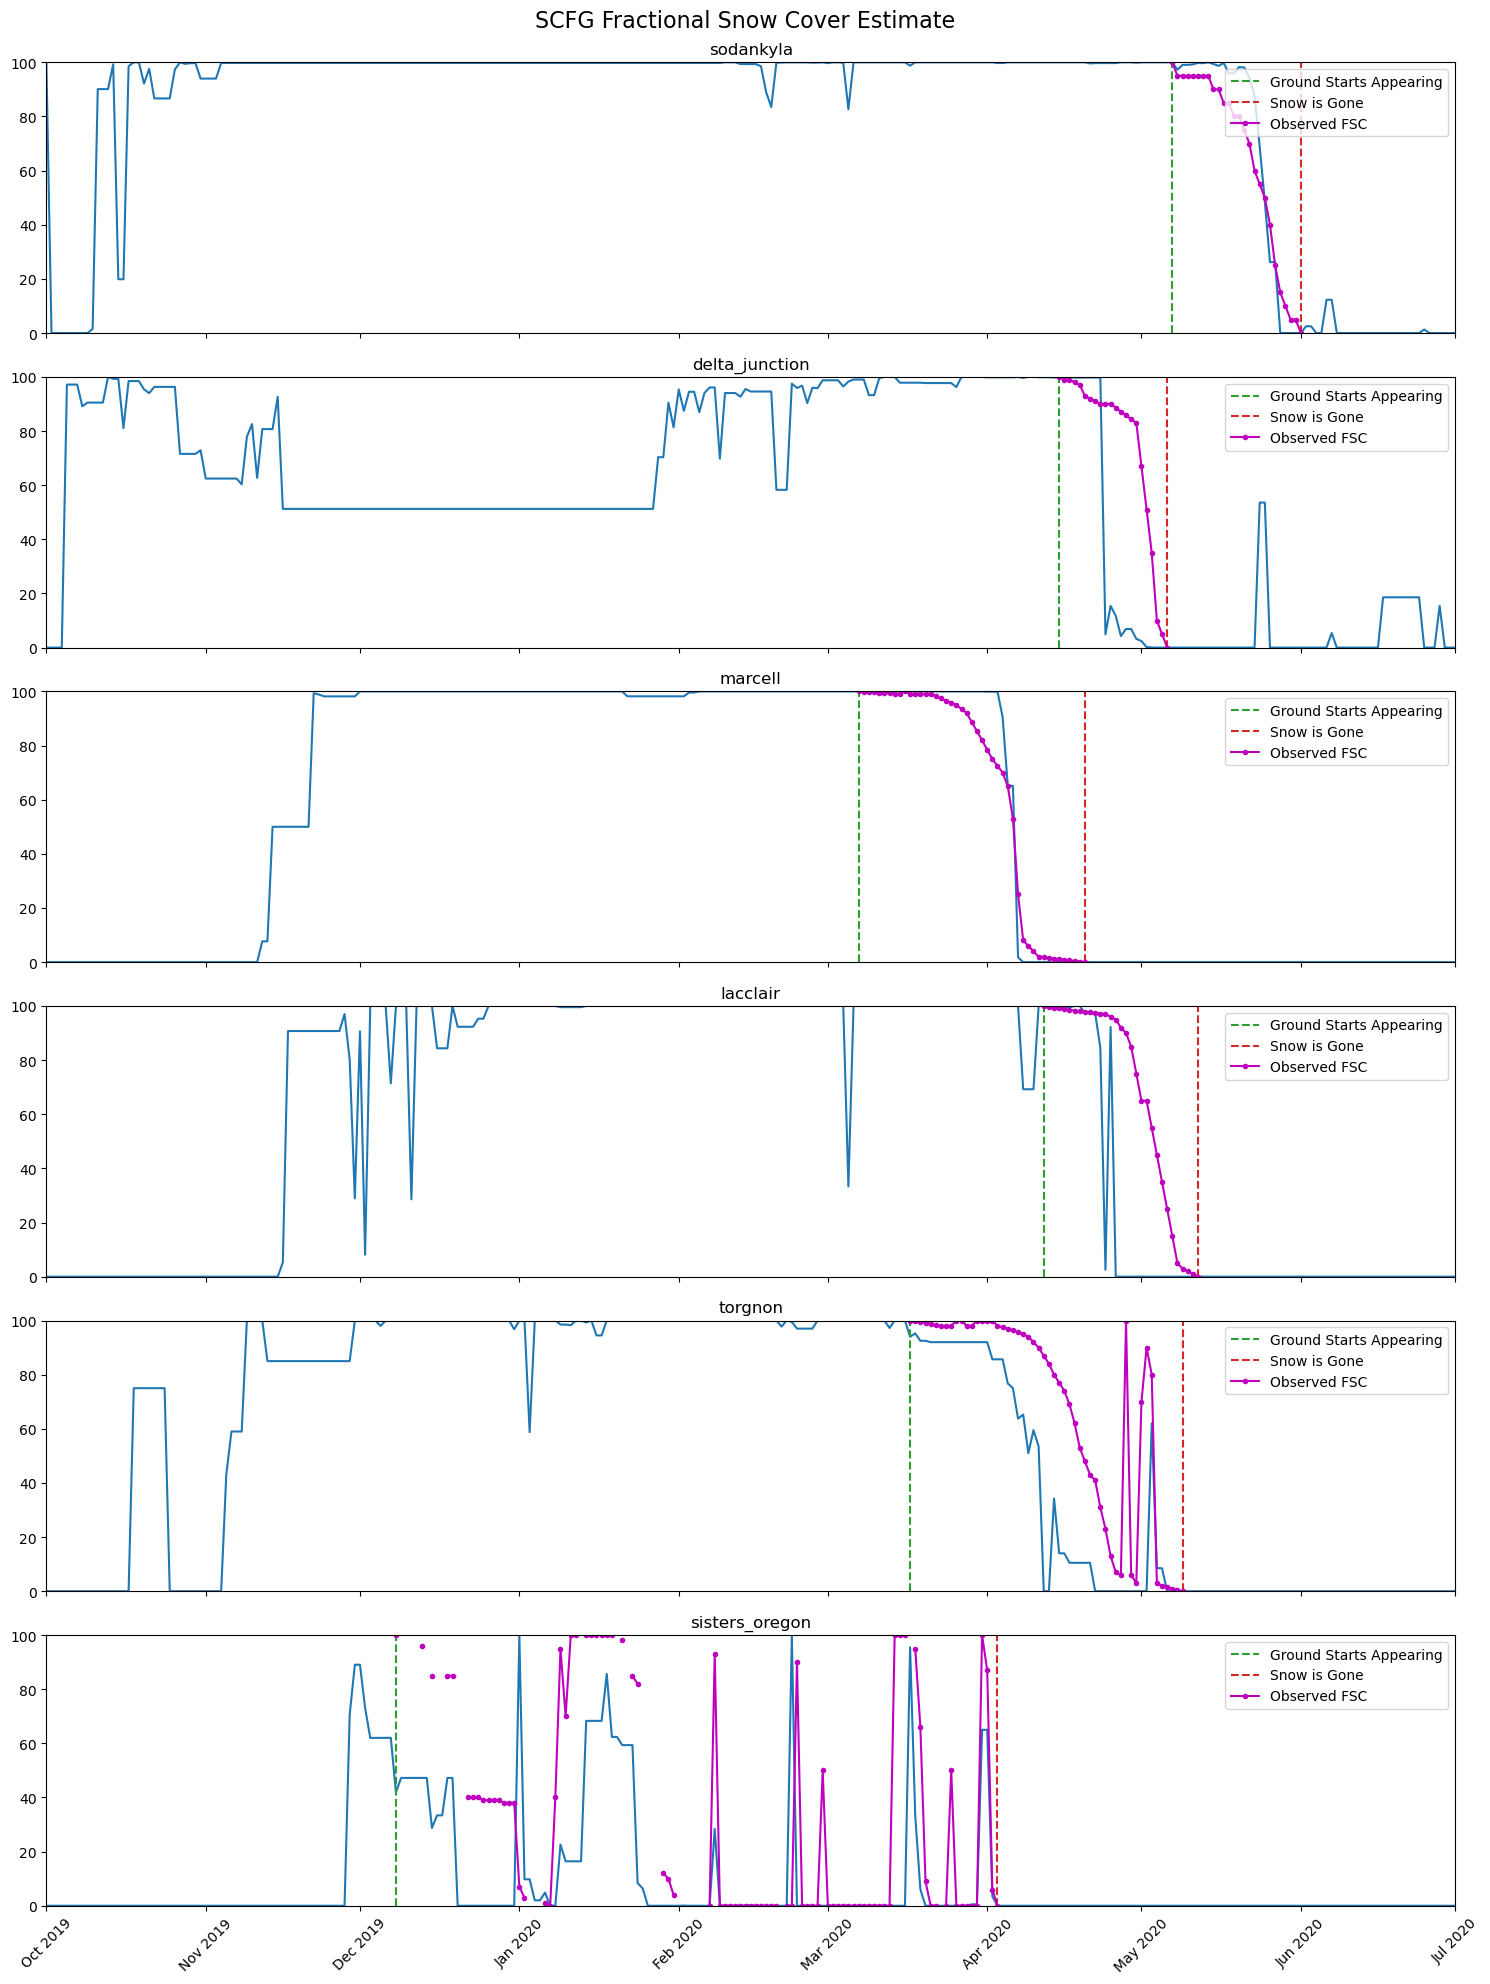

In [2]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
labels = ['sodankyla', 'delta_junction', 'marcell', 'lacclair', 'torgnon', 'sisters_oregon']
first_lines = [datetime.strptime('20200509', '%Y%m%d'),
              datetime.strptime('20200416', '%Y%m%d'),
              datetime.strptime('20200327', '%Y%m%d'),
              datetime.strptime('20200411', '%Y%m%d'),
              datetime.strptime('20200402', '%Y%m%d'),
              datetime.strptime('20191211', '%Y%m%d')]
second_lines = [datetime.strptime('20200603', '%Y%m%d'),
               datetime.strptime('20200507', '%Y%m%d'),
               datetime.strptime('20200412', '%Y%m%d'),
               datetime.strptime('20200511', '%Y%m%d'),
               datetime.strptime('20200508', '%Y%m%d'),
               datetime.strptime('20200201', '%Y%m%d')]

# Create subplots: 6 rows, 1 column
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20), sharex=True)

# Formatting the x-axis limits
start_limit = datetime.strptime('20191001', '%Y%m%d')  
end_limit = datetime.strptime('20200701', '%Y%m%d')    

camera_snow_data = pd.read_excel("snow_timeline.xlsx")

locations = ['Sodankyla', 'Delta Junction', 'Marcell', 'Lacclair', 'Torgnon', 'Sisters']

for i, ax in enumerate(axes):
    # Plot data for each site
    if i == 4:
        ax.plot(date_array, values_1[i], color='tab:blue') #, label=labels[i]
    else:
        ax.plot(date_array, values_3[i], color='tab:blue') #, label=labels[i]
    
    # Add dashed vertical lines
    # ax.axvline(first_lines[i], color='tab:green', linestyle='--', linewidth=1.5, label='Melt Starts')
    # ax.axvline(second_lines[i], color='tab:red', linestyle='--', linewidth=1.5, label='Melt Ends')

    sodankyla_data = camera_snow_data[(camera_snow_data['Location'] == locations[i]) & 
                                      (camera_snow_data['Melt Year'] == 2020)]
    sod_obs = sodankyla_data['FSC'].values.tolist()
    sod_dates = pd.to_datetime(sodankyla_data['Date']).tolist()

    ax.axvline(sod_dates[0], color='tab:green', linestyle='--', linewidth=1.5, label='Ground Starts Appearing')
    ax.axvline(sod_dates[-1], color='tab:red', linestyle='--', linewidth=1.5, label='Snow is Gone')
    
    axes[i].plot(sod_dates, sod_obs, 'm.-', label='Observed FSC')

    # Formatting each subplot
    ax.set_title(labels[i])  # Title for each subplot
    ax.set_ylim(0, 100)  # Set the y-axis limits
    ax.set_xlim([start_limit, end_limit])  # Set the x-axis limits
    ax.legend(loc='upper right')  # Add legend to each subplot
    ax.xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks on the first of each month
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format ticks as Month-Year

# Rotate tick labels for shared x-axis
plt.xticks(rotation=45)

# Set the main title and adjust layout
fig.suptitle('SCFG Fractional Snow Cover Estimate', fontsize=16, y=.99)
plt.tight_layout()
plt.show()

# Validation

# SCFG put into df

In [2]:
from scripts.imports import *
# df=pd.read_pickle('dataset_landcover_forest_22.pkl')
df=pd.read_pickle('work_in_progress.pkl')
df.columns

Index(['Camera', 'x_coord', 'y_coord', 'Date', 'Snow', 'SCFG', 'lon', 'lat',
       'landcover', 'forest_fraction', 'cc'],
      dtype='object')

In [24]:
import pandas as pd
import xarray as xr
import numpy as np
from datetime import datetime
import os
import psutil

# df=pd.read_pickle('dataset_landcover_forest_22.pkl')

df['SCFG'] = None
# df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df.columns]

def compute_scfg_value(scfg_data, coord, radius_km=2, threshold=100, default_value=200):
    """
    Compute the SCFG value as the average of values ≤ threshold within a radius_km,
    or set to default_value if all values exceed the threshold.

    Parameters:
        scfg_data (xarray.DataArray): The dataset with SCFG values and spatial dimensions (lat, lon).
        coord (tuple): The coordinate as (lon, lat) for which the value is computed.
        radius_km (float): The radius in kilometers to search around the given coordinate (default: 2).
        threshold (float): The maximum value to include in the average (default: 100).
        default_value (float): The value to assign if all values exceed the threshold (default: 200).

    Returns:
        float: The computed SCFG value.
    """
    # Unpack coordinates
    lon, lat = coord

    # Convert radius from kilometers to degrees
    radius_deg_lat = radius_km / 111.0  # 1 degree latitude ≈ 111 km
    radius_deg_lon = radius_km / (111.0 * np.cos(np.radians(lat)))  # Adjust for latitude

    # Subset the data within the radius
    subset = scfg_data.sel(
        lat=slice(lat - radius_deg_lat, lat + radius_deg_lat),
        lon=slice(lon - radius_deg_lon, lon + radius_deg_lon)
    )

    # Mask values greater than the threshold
    valid_values = subset.where(subset <= threshold, drop=True)

    # Calculate the average or assign the default value
    if valid_values.size > 0:  # If there are valid values
        return valid_values.mean().item()
    else:  # If all values exceed the threshold
        return default_value

print(df['date'].unique().shape[0])
for i in range(df['date'].unique().shape[0]):
    print(i)
    print(df['date'].unique()[i])
    
    # Function to convert date string from 'dd/mm/yyyy' to 'yyyymmdd'
    def format_date_to_filename(date_str):
        return datetime.strptime(date_str, '%d/%m/%Y').strftime('%Y%m%d')
    
    file_date = format_date_to_filename(df['date'].unique()[i])
    year = file_date[:4]
    month = file_date[4:6]
    file_path = f'../data_store/data/SCFG/dap.ceda.ac.uk/{year}/{month}/{file_date}-ESACCI-L3C_SNOW-SCFG-MODIS_TERRA-fv3.0.nc'
    
    if not os.path.exists(file_path):
        print('No')
    
    else:
        dataset = xr.open_dataset(file_path)
        scfv_data = dataset['scfg']
        
        for index, row in df.iterrows():
            if row['date'] == df['date'].unique()[i]:
                if row['camera'] == 'torgnon':
                    r = 1
                else:
                    r = 3
                # scfv_value = compute_scfg_value(scfv_data, coord = (row['lon'],row['lat']), radius_km=r)
                scfv_value_array = scfv_data.sel(lat=row['lat'], lon=row['long'], method='nearest').isel(time=0).values
                scfv_value = scfv_value_array.item() if isinstance(scfv_value_array, np.ndarray) else scfv_value_array
                if scfv_value > 100:
                    df.loc[index, 'SCFG'] = None
                else:
                    df.loc[index, 'SCFG'] = scfv_value
                # print(type(scfg_value))

    print(f"Memory usage: {psutil.Process(os.getpid()).memory_info().rss / (1024 ** 3):.2f} GB")
    
    print(df[df['date'] == df['date'].unique()[i]]['SCFG'])
# df.to_pickle('dataset_scfg.pkl')

# df[df['date'] == df['date'].unique()[i]]['SCFG']

153
0
12/01/2019
Memory usage: 0.38 GB
0     None
1     None
2     None
3     None
4     None
      ... 
58    None
59    None
60    None
61    None
62    None
Name: SCFG, Length: 63, dtype: object
1
24/01/2019
Memory usage: 0.40 GB
63     None
64     None
65     None
66     None
67     None
       ... 
277    None
278    None
279    None
280    None
281    None
Name: SCFG, Length: 219, dtype: object
2
27/03/2019
Memory usage: 0.39 GB
282    None
283    None
284    None
285    None
286    None
       ... 
436    None
437    None
438    None
439    None
440    None
Name: SCFG, Length: 159, dtype: object
3
13/04/2019
Memory usage: 0.41 GB
441    None
442    None
443    None
444    None
445    None
446    None
447    None
448    None
449    None
450    None
451    None
452    None
453    None
454    None
455    None
456    None
457    None
458    None
459    None
460    None
461    None
462    None
463    None
464    None
465    None
466    None
467    None
468    None
469    None
470    

In [25]:
# df.to_pickle('dataset_landcover_forest_22_SCFG.pkl')

# SCFG accuracy from dataframe

In [11]:
# df_grouped = df.groupby(['camera','date','lat','lon']).agg({
#     'pvpg': 'mean',
#     'pv': 'max',
#     'pg': 'max',
#     'data_quantity': 'mean',
#     'snr': 'mean',
#     'FSC': 'mean',
#     'TreeSnow': 'mean',
#     'layer_flag': 'mean',
#     'file_index': 'mean',
#     'msw_flag': 'mean',
#     # 'pv_ratio': 'mean',
#     'pv_ratio_mean': 'mean',
#     'pv_ratio_max': 'mean'
# }).reset_index()

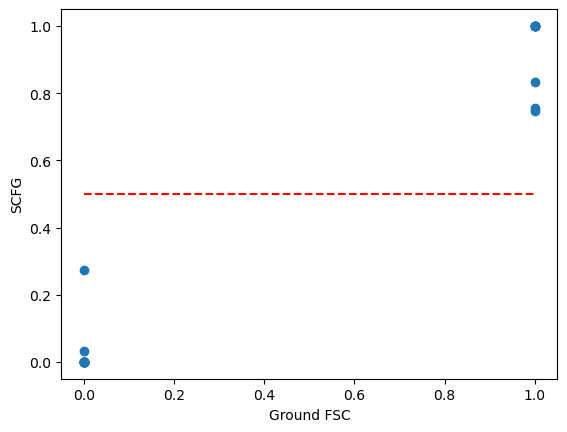

In [4]:
from scripts.imports import *

df=pd.read_pickle('dataset_landcover_all_22_th1_SCFG.pkl')

###
#len(df), len(df[df['segment_landcover'].isin([111,112,113,114,115,116,121,122,123,124,125,126])])
###

df_grouped = df[((df['FSC']<= 0.05)|(df['FSC']>=0.95))&(df['segment_landcover'].isin([111,112,113,114,115,116,121,122,123,124,125,126]))].groupby(['camera','date','lat','lon']).agg({
    'SCFG': 'mean',
    'FSC': 'mean'
}).reset_index()
df_grouped
plt.scatter(df_grouped['FSC'], df_grouped['SCFG'])
plt.xlabel('Ground FSC')
plt.ylabel('SCFG')
plt.plot([0,1],[0.5,0.5], 'r--')

# df_grouped[(df_grouped['SCFG'] > 80)&(df_grouped['FSC'] == 0)]
# df[df['SCFG']<=1]

#### includes SCFG data up to 2022

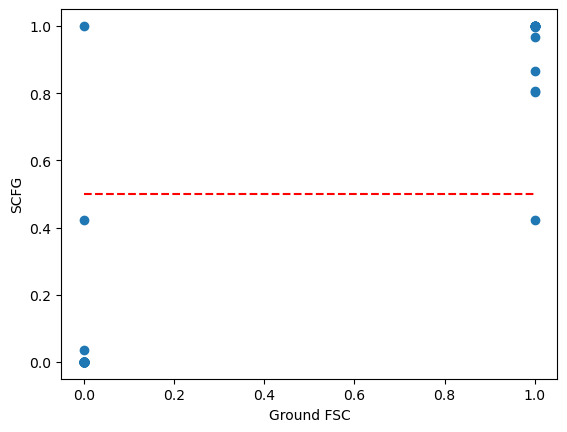

In [3]:
from scripts.imports import *

# includes SCFG data up to 2022
df=pd.read_pickle('dataset_landcover_forest_22_th1_SCFG.pkl')

###
#len(df), len(df[df['segment_landcover'].isin([111,112,113,114,115,116,121,122,123,124,125,126])])
###

df_grouped = df[((df['FSC']<= 0.05)|(df['FSC']>=0.95))&(df['segment_landcover'].isin([111,112,113,114,115,116,121,122,123,124,125,126]))].groupby(['camera','date','lat','lon']).agg({
    'SCFG': 'mean',
    'FSC': 'mean'
}).reset_index()
df_grouped
plt.scatter(df_grouped['FSC'], df_grouped['SCFG'])
plt.xlabel('Ground FSC')
plt.ylabel('SCFG')
plt.plot([0,1],[0.5,0.5], 'r--')

# df_grouped[(df_grouped['SCFG'] > 80)&(df_grouped['FSC'] == 0)]
# df[df['SCFG']<=1]

# SCFG accuracy from excel

In [1]:
from scripts.imports import *

df = pd.read_excel('SCFG_binary.xlsx')
df

,Camera,x_coord,y_coord,Date,Snow
0,sodankyla,26.634154,67.361833,2019-01-01,1
1,sodankyla,26.634154,67.361833,2019-01-02,1
2,sodankyla,26.634154,67.361833,2019-01-03,1
3,sodankyla,26.634154,67.361833,2019-01-04,1
4,sodankyla,26.634154,67.361833,2019-01-05,1
...,...,...,...,...,...
4056,oregon,-121.606000,44.323800,2020-12-10,0
4057,oregon,-121.606000,44.323800,2020-12-13,1
4058,oregon,-121.606000,44.323800,2020-12-19,0
4059,oregon,-121.606000,44.323800,2020-12-20,0


### turn excel into SCFG df

In [117]:
from scripts.imports import *

df = pd.read_excel('SCFG_binary.xlsx')

# temp_df = df.iloc[63:66].copy()
# temp_df = df.iloc[3000:3010].copy()
temp_df = df.copy()

temp_df.loc[:, 'SCFG'] = None
temp_df.loc[:, 'lon'] = None
temp_df.loc[:, 'lat'] = None
# df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df.columns]

def compute_scfg_value(dataset, coord, radius_km=4, threshold=100, default_value=None):
    """
    Compute the SCFG value as the average of values ≤ threshold within a radius_km,
    or set to default_value if all values exceed the threshold.

    Parameters:
        scfg_data (xarray.DataArray): The dataset with SCFG values and spatial dimensions (lat, lon).
        coord (tuple): The coordinate as (lon, lat) for which the value is computed.
        radius_km (float): The radius in kilometers to search around the given coordinate (default: 2).
        threshold (float): The maximum value to include in the average (default: 100).
        default_value (float): The value to assign if all values exceed the threshold (default: 200).

    Returns:
        float: The computed SCFG value.
    """
    # Unpack coordinates
    lon, lat = coord

    scfg_data = dataset['scfg']

    # Convert radius from kilometers to degrees
    radius_deg_lat = radius_km / 111.0  # 1 degree latitude ≈ 111 km
    radius_deg_lon = radius_km / (111.0 * np.cos(np.radians(lat)))  # Adjust for latitude

    # Subset the data within the radius
    subset = dataset.sel(
        lat=slice(lat - radius_deg_lat, lat + radius_deg_lat),
        lon=slice(lon - radius_deg_lon, lon + radius_deg_lon)
    )

    valid_values = subset['scfg'].where(subset['scfg'] <= threshold)
    lons = subset['lon']
    lats = subset['lat']

    lon_grid,lat_grid = np.meshgrid(lons, lats)
    
    # valid_values = proxy['scfg']
    # print(valid_values)
    # Calculate the average or assign the default value
    if valid_values.size > 0:  # If there are valid values
        # plt.figure()
        # valid_values.plot(vmin=0, vmax=100)
        # print(valid_values.values.flatten())
        return valid_values.values.flatten()/100, lon_grid.flatten(), lat_grid.flatten()
    else:  # If all values exceed the threshold
        return [default_value], [default_value], [default_value]

#print(temp_df['Date'].unique().shape[0])
for i in range(temp_df['Date'].unique().shape[0]):
    #print(i)
    #print(temp_df['Date'].unique()[i])
    
    # Function to convert date string from 'dd/mm/yyyy' to 'yyyymmdd'
    def format_date_to_filename(date_str):
        if isinstance(date_str, pd.Timestamp):
            date_str = date_str.strftime("%Y-%m-%d")
        return datetime.strptime(date_str, "%Y-%m-%d").strftime("%Y%m%d")
    
    file_date = format_date_to_filename(temp_df['Date'].unique()[i])
    year = file_date[:4]
    month = file_date[4:6]
    file_path = f'../data_store/data/SCFG/dap.ceda.ac.uk/{year}/{month}/{file_date}-ESACCI-L3C_SNOW-SCFG-MODIS_TERRA-fv3.0.nc'
    
    if not os.path.exists(file_path):
        print('No')
    
    else:
        dataset = xr.open_dataset(file_path)
        
        for index, row in temp_df.iterrows():
            if row['Date'] == temp_df['Date'].unique()[i]:
                if row['Camera'] == 'torgnon':
                    r = 1
                else:
                    r = 4
                scfv_value, lon_grid, lat_grid = compute_scfg_value(dataset, coord = (row['x_coord'],row['y_coord']), radius_km=r)
                # scfv_value_array = scfv_data.sel(lat=row['latitude'], lon=row['longitude'], method='nearest').isel(time=0).values
                # scfv_value = scfv_value_array.item() if isinstance(scfv_value_array, np.ndarray) else scfv_value_array
                temp_df.at[index, 'SCFG'], temp_df.at[index, 'lon'], temp_df.at[index, 'lat'] = scfv_value, lon_grid, lat_grid
                # print(type(scfg_value))

    #print(f"Memory usage: {psutil.Process(os.getpid()).memory_info().rss / (1024 ** 3):.2f} GB")
temp_df = temp_df.explode(['SCFG', 'lon', 'lat']).reset_index(drop=True)
temp_df
# print(temp_df.explode('SCFG').reset_index(drop=True))
    # print(temp_df[temp_df['Date'] == temp_df['Date'].unique()[i]]['SCFG'])
    # print(scfv_value.flatten())

,Camera,x_coord,y_coord,Date,Snow,SCFG,lon,lat
0,sodankyla,26.634154,67.361833,2019-01-01,1,NaN,26.545,67.335
1,sodankyla,26.634154,67.361833,2019-01-01,1,NaN,26.555,67.335
2,sodankyla,26.634154,67.361833,2019-01-01,1,NaN,26.565,67.335
3,sodankyla,26.634154,67.361833,2019-01-01,1,NaN,26.575,67.335
4,sodankyla,26.634154,67.361833,2019-01-01,1,NaN,26.585,67.335
...,...,...,...,...,...,...,...,...
316343,oregon,-121.606000,44.323800,2020-12-21,0,NaN,-121.605,44.355
316344,oregon,-121.606000,44.323800,2020-12-21,0,NaN,-121.595,44.355
316345,oregon,-121.606000,44.323800,2020-12-21,0,0.0,-121.585,44.355
316346,oregon,-121.606000,44.323800,2020-12-21,0,0.0,-121.575,44.355


In [120]:
# temp_df.to_pickle('SCFG_accuracy.pkl')

In [16]:
from scripts.imports import *
df = pd.read_pickle('SCFG_accuracy.pkl')
df

,Camera,x_coord,y_coord,Date,Snow,SCFG,lon,lat
0,sodankyla,26.634154,67.361833,2019-01-01,1,NaN,26.545,67.335
1,sodankyla,26.634154,67.361833,2019-01-01,1,NaN,26.555,67.335
2,sodankyla,26.634154,67.361833,2019-01-01,1,NaN,26.565,67.335
3,sodankyla,26.634154,67.361833,2019-01-01,1,NaN,26.575,67.335
4,sodankyla,26.634154,67.361833,2019-01-01,1,NaN,26.585,67.335
...,...,...,...,...,...,...,...,...
316343,oregon,-121.606000,44.323800,2020-12-21,0,NaN,-121.605,44.355
316344,oregon,-121.606000,44.323800,2020-12-21,0,NaN,-121.595,44.355
316345,oregon,-121.606000,44.323800,2020-12-21,0,0.0,-121.585,44.355
316346,oregon,-121.606000,44.323800,2020-12-21,0,0.0,-121.575,44.355


### work out how landcover maps work

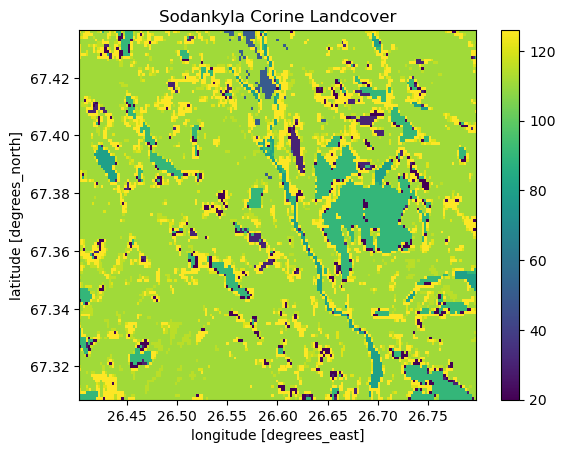

In [8]:
from scripts.imports import *
import rioxarray

tif_path = '../data_store/data/corine_sodankyla/Results/PROBAV_LC100_global_v3.0.1_2019-nrt_Discrete-Classification-map_EPSG-4326.tif'

ds = rioxarray.open_rasterio(tif_path)

ds = ds.rio.reproject("EPSG:4326")

ds.sel(band=1).plot()
plt.title("Sodankyla Corine Landcover")

plt.plot([7.5609],[45.8238],'r.')
plt.show()

# with rasterio.open(tif_path) as dataset:
#     # Read the first band
#     band1 = dataset.read(1)

#     # Get metadata
#     meta = dataset.meta

# with rasterio.open(corine_sod) as dataset:
#     print("Width:", dataset.width)
#     print("Height:", dataset.height)
#     print("Number of bands:", dataset.count)
#     print("Coordinate Reference System (CRS):", dataset.crs)
#     print("Bounds:", dataset.bounds)
#     print("Transform:", dataset.transform)

# plt.imshow(band1, cmap="gray")
# plt.colorbar(label="Pixel Values")
# plt.title("Raster Image")
# plt.show()

### insert landcover information into SCFG dataframe

In [5]:
from scripts.imports import *
df = pd.read_pickle('SCFG_accuracy.pkl')

test = df.copy()
test['landcover'] = None
test['forest_fraction'] = None
for index, row in test.iterrows():
    tif_path = f"../data_store/data/corine_{row['Camera']}/Results/PROBAV_LC100_global_v3.0.1_2019-nrt_Discrete-Classification-map_EPSG-4326.tif"
    ds = rioxarray.open_rasterio(tif_path)
    ds = ds.rio.reproject("EPSG:4326")

    meter_to_degree_lat = 1 / 111320
    meter_to_degree_lon = meter_to_degree_lat / np.cos(np.radians(row['lat']))

    delta_lat = (1000 / 2) * meter_to_degree_lat
    delta_lon = (1000 / 2) * meter_to_degree_lon

    subset = ds.sel(
        x=slice(row['lon'] - delta_lon, row['lon'] + delta_lon),
        y=slice(row['lat'] + delta_lat, row['lat'] - delta_lat),  # Latitude decreases downward
        band=1
    )

    values = subset.values.flatten()
    values = values[~np.isnan(values)]

    if len(values) == 0:
        test.at[index, 'forest'], test.at[index, 'landcover'] = None

    else:
        count_in_range = np.sum((values >= 111) & (values <= 126))
        fraction = count_in_range / len(values)
        test.at[index, 'forest_fraction'] = fraction
        test.at[index, 'landcover'] = mode(values)[0]

test

,Camera,x_coord,y_coord,Date,Snow,SCFG,lon,lat,landcover,forest_fraction
0,sodankyla,26.634154,67.361833,2019-01-01,1,NaN,26.545,67.335,111,0.956522
1,sodankyla,26.634154,67.361833,2019-01-01,1,NaN,26.555,67.335,111,0.927536
2,sodankyla,26.634154,67.361833,2019-01-01,1,NaN,26.565,67.335,111,0.898551
3,sodankyla,26.634154,67.361833,2019-01-01,1,NaN,26.575,67.335,111,0.888889
4,sodankyla,26.634154,67.361833,2019-01-01,1,NaN,26.585,67.335,111,0.89372
...,...,...,...,...,...,...,...,...,...,...
316343,oregon,-121.606000,44.323800,2020-12-21,0,NaN,-121.605,44.355,111,1.0
316344,oregon,-121.606000,44.323800,2020-12-21,0,NaN,-121.595,44.355,111,1.0
316345,oregon,-121.606000,44.323800,2020-12-21,0,0.0,-121.585,44.355,111,1.0
316346,oregon,-121.606000,44.323800,2020-12-21,0,0.0,-121.575,44.355,111,1.0


In [6]:
# test.to_pickle('SCFG_accuracy_w_forest_frac.pkl')

316348
118076
75087


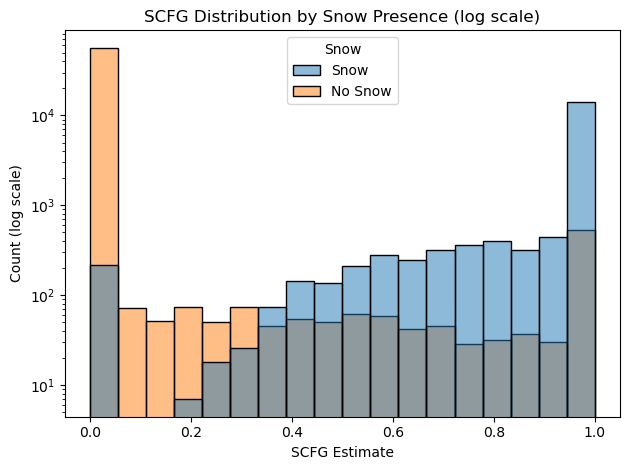

In [1]:
from scripts.imports import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_pickle('SCFG_accuracy_w_forest_frac.pkl')
print(len(df))
print(len(df[df['SCFG'] <= 1]))
print(len(df[(df['SCFG'] <= 1) & (df['forest_fraction'] >= .95)]))

temp_df = df[(df['SCFG'] <= 1) & (df['forest_fraction'] >= .95)].copy()

plt.figure()
temp_df['Snow'] = temp_df['Snow'].map({0: 'No Snow', 1: 'Snow'}).copy()

sns.histplot(data=temp_df, x='SCFG', hue='Snow')

# set log scale on y-axis
plt.yscale("log")

plt.xlabel('SCFG Estimate')
plt.ylabel('Count (log scale)')
plt.title('SCFG Distribution by Snow Presence (log scale)')
plt.tight_layout()
plt.show()


In [27]:
# from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# # Copy data
# data = temp_df.copy()

# # Define threshold search space
# thresholds = np.linspace(0, 1, 101)  # 101 values from 0 to 1
# best_threshold = 0.5
# best_f1 = 0

# # Search for best threshold
# for t in thresholds:
#     data['classification'] = data['SCFG'].apply(lambda x: 0 if x <= t else 1)
#     f1 = f1_score(data['Snow'], data['classification'], average='weighted')
    
#     if f1 > best_f1:
#         best_f1 = f1
#         best_threshold = t

# # Apply best threshold
# data['classification'] = data['SCFG'].apply(lambda x: 0 if x <= best_threshold else 1)

# # Compute confusion matrix
# labels = ['No Snow', 'Snow']
# cm = confusion_matrix(data['Snow'], data['classification'])

# # Calculate accuracy and F1-score
# accuracy = accuracy_score(data['Snow'], data['classification'])
# f1 = f1_score(data['Snow'], data['classification'], average='weighted')

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title(f'Confusion Matrix (Threshold={best_threshold:.2f})\nAccuracy: {accuracy:.2f}, F1 Score: {f1:.2f}')
# plt.tight_layout()
# plt.show()

# # Print best threshold
# print(f'Best threshold: {best_threshold:.2f}, Best F1-score: {best_f1:.2f}')

# # Identify misclassified cases
# misclassified = data[((data['classification'] == 0) & (data['Snow'] > 0.95)) |
#                      ((data['classification'] == 1) & (data['Snow'] < 0.05))]
# misclassified[misclassified['Camera']=='sodankyla']


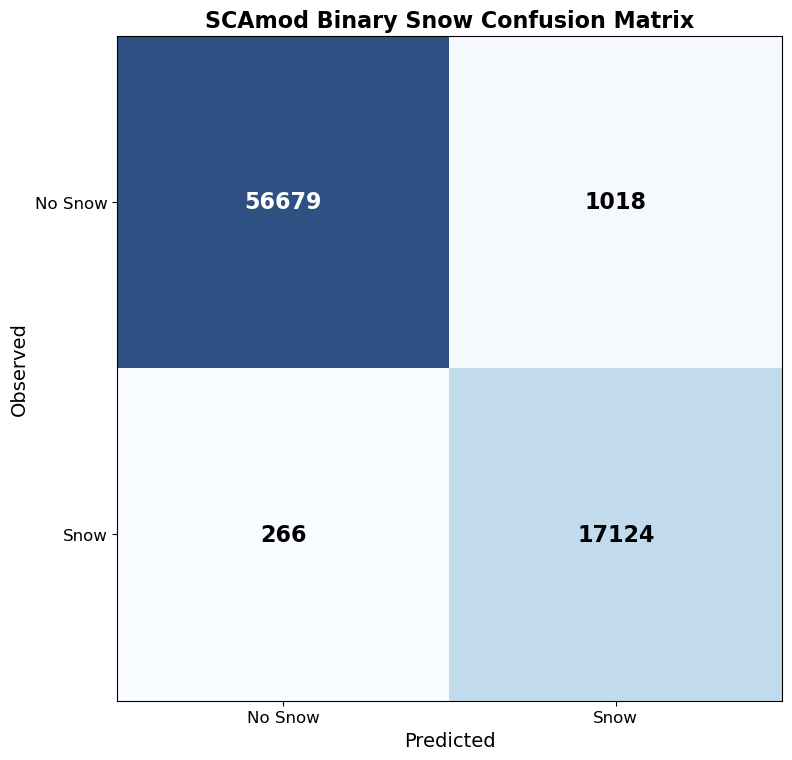

123

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

data = temp_df.copy()

# Rule-based classifier (int 0/1)
data.loc[:, 'classification'] = data.apply(
    lambda row: 0 if row['SCFG'] <= 0.34 else 1,
    axis=1
)

# --- Map true labels to integers to match predictions ---
label_map = {'No Snow': 0, 'Snow': 1}
y_true = data['Snow'].map(label_map)
y_pred = data['classification'].astype(int)

# (Optional) sanity check: ensure no unmapped labels
if y_true.isna().any():
    unmapped = data.loc[y_true.isna(), 'Snow'].unique()
    raise ValueError(f"Unmapped labels in y_true: {unmapped}. Update label_map accordingly.")

# Confusion matrix + metrics
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')

# Plot like the second snippet
labels_str = ['No Snow', 'Snow']
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm, cmap='Blues', alpha=0.85)

max_val = cm.max() if cm.size else 1
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        val = cm[i, j]
        ax.text(j, i, f"{val}", ha='center', va='center',
                fontsize=16, fontweight='bold',
                color='white' if val > max_val / 2 else 'black')

ax.set_xticks(np.arange(2)); ax.set_yticks(np.arange(2))
ax.set_xticklabels(labels_str, fontsize=12)
ax.set_yticklabels(labels_str, fontsize=12)
ax.set_xlabel('Predicted', fontsize=14)
ax.set_ylabel('Observed', fontsize=14)
plt.title(f'SCAmod Binary Snow Confusion Matrix',
          fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

# Misclassified examples using numeric y_true (matches earlier logic)
misclassified = data[
    ((y_pred == 0) & (y_true == 1)) |
    ((y_pred == 1) & (y_true == 0))
]
len(misclassified[misclassified['Camera'] == 'oregon'])


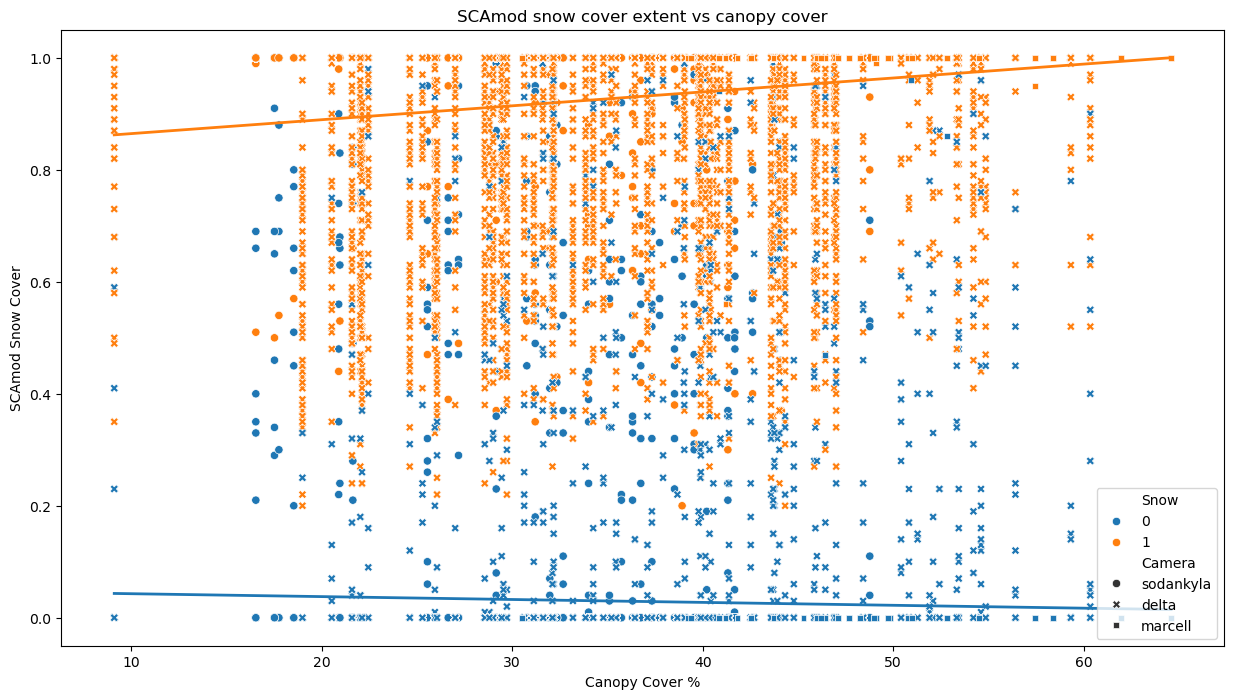

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_pickle('work_in_progress.pkl')

plt.figure(figsize=(15, 8))
colors = ['blue', 'orange']

for i in [0,1]:
    loc_df = df[(df['cc'] >= 0)&(df['Snow']==i)&(df['forest_fraction']>=.95)].copy().reset_index()
    
    X = loc_df['cc'].astype(float).values  # Canopy Cover %
    y = loc_df['SCFG'].astype(float).values
    
    mask = np.isfinite(X) & np.isfinite(y)
    X = X[mask].reshape(-1, 1)
    y = y[mask]
    
    X_with_const = sm.add_constant(X)
    
    model = sm.OLS(y, X_with_const)
    results = model.fit()
    
    slope = results.params[1]
    p_value = results.pvalues[1]
    
    x_vals = np.linspace(X.min(), X.max(), 100)
    y_vals = results.predict(sm.add_constant(x_vals.reshape(-1, 1)))
    # plt.plot(x_vals, y_vals, color=colors[i-1], linewidth=2, label=f'Best Fit {labels[i-1]}')
    plt.plot(x_vals, y_vals, linewidth=2)

loc_df = df[(df['cc'] >= 0)&(df['forest_fraction']>=.95)].copy().reset_index()
scatter = sns.scatterplot(data=loc_df, x='cc', y='SCFG', hue='Snow', style='Camera',palette='tab10', legend='brief')

# Update the legend labels
hue_labels = {'0.0': 'No Snow', '1.0': 'Snow'}  # Note keys are strings for exact matching
handles, labels = scatter.get_legend_handles_labels()

# Update legend labels based on the hue_labels dictionary
new_labels = [hue_labels.get(label, label) for label in labels]

plt.legend(handles=handles, labels=new_labels, loc='lower right')

# Customize and show the plot
plt.xlabel('Canopy Cover %')
plt.ylabel('SCAmod Snow Cover')

plt.title('SCAmod snow cover extent vs canopy cover')

plt.show()